## Проект. Анализ данных на примере статистики трендов Ютуба. Выполнил - Славный Богдан

## Введение

Это реальный датасет. Собран одним из пользователей площадки Kaggle с помощью бота.   
Ссылка на датасет на площадке Kaggle https://www.kaggle.com/datasnaek/youtube-new   

Просмотрев десятки работ других членов площадки Kaggle, я не нашел ни единого отчета, который бы тоже обнаружил дубликаты в данном датасете. Дубликаты могут довольно существенно исказить данные, и соответственно повлиять на принимаемые решения не в лучшую сторону.

Прежде, чем приступать к обработке датасета, сначала разберем в общем проблему.   
На площадке Ютуб есть вкладка "Тренды". Туда попадают в основном "вирусные" видео - те, которые стремительно набирают популярность. Алгоритм Ютуба на основании огромного количества факторов решает, какое видео попадет в тренды, а какое - нет. Этими факторами могут быть - рост кол-ва просмотров, лайков, репостов, активность комментариев... При чем Ютуб выделяет ежедневные квоты на видео на каждую страну.  
Задача - обработать датасет (занести файлы - json, csv в одну таблицу), привести данные к нужному виду. Определить, какие факторы являются решающими при попадании видео в тренды. Ответить на вопросы, которые позволяют посмотреть на данные с разных сторон. 

**Также могу сформировать такой же отчет на английском и немецком языках.**

## Содержание (ссылки кликабельны для более быстрой навигации по проекту)

1. [Загрузка, объединение, обработка, экспорт данных](#1.)
2. [Удаление дубликатов](#2.)   
    2.1 [Описание проблемы с дубликатами](#2.1)   
    
    2.2 [Решение проблемы с дубликатами и неопределенными video_id](#2.2)   
    2.2.1 [Решаем проблему с неопределенными video_id](#2.2.1)   
    2.2.2 [Решаем проблему с дубликатами строчек](#2.2.2)   
    2.2.3 [Проверяем результат нашей работы на дубликаты](#2.2.3)     
        
        
3. [Ответы на вопросы сотрудников из отдела маркетинга](#3.)   
    3.1 [Какие факторы влияют на попадание видео в тренды](#3.1)   
    3.2 [Каковы вкусовые предпочтения жителей разных стран?](#3.2)  
    3.3 [Как различаются вкусовые предпочтения россиян и жителей других стран (в среднем)](#3.3)  
    3.4 [Правда ли, что индусы и немцы смотрят одно и то же?](#3.4)  
    3.5 [Соотношение просмотров/лайков/дизлайков для разных категорий.](#3.5)  
    3.6 [Какие категории являются наиболее просматриваемыми на Ютубе?](#3.6)  
    3.7 [Сколько просмотров набирают видео относительно каждой категории по медиане?](#3.7) 
    
    3.8 [Сезонность трендов в Британии.](#3.8)  
    3.8.1 [Почему начала расти доля категории "Музыка" в трендах Британии? Выдвинуть гипотезу](#3.8.1)
    
    3.9 [Суточные квоты Ютуба на тренды для стран](#3.9)  
    3.10 [Как быстро в среднем видео попадают в тренды после выпуска?](#3.10)  
    3.11 [Почему одно и то же видео находится в трендах британии в 2 раза дольше, чем в трендах США?](#3.11)  
    
    3.12 [Найти новостные инфоповоды, которые повлияли на тренды Ютуба](#3.12)  
    3.12.1 [Инфоповод по поводу смерти солистки группы Crannberies - Dolores Mary Eileen O'Riordan](#3.12.1)  
    3.12.2 [Инфоповод по поводу сексуального скандала актрисы Сальмы Хайек и американского кинопродюссера Харви Вайнштейна](#3.12.2)
    

In [37]:
df_no_duplicates.head(2)

video_id        trending_date  \
0  --1skHapGUc  2018-02-10 00:00:00   
1  --2K8l6BWfw  2018-03-06 00:00:00   

                                               title  channel_title  \
0  SI TE RÍES, PIERDES (NIVEL ASIÁTICO) #51 Los M...   TheChacal547   
1                   La Relève #2 : Jessica Rodrigues  Georgette Mag   

                                                tags  views  likes  dislikes  \
0  Videos de Risa|"Si te ries pierdes"|"videos gr...  30914    483        77   
1  Jessica Rodrigues"|"jumping"|"horse"|"cheval"|...   4822    694         4   

   comment_count                                  thumbnail_link  ...  \
0             81  https://i.ytimg.com/vi/--1skHapGUc/default.jpg  ...   
1             34  https://i.ytimg.com/vi/--2K8l6BWfw/default.jpg  ...   

   ratings_disabled  video_error_or_removed  \
0                 0                       0   
1                 0                       0   

                                         description        category  \
0  Video para partirse de risa! pero cuidado, int...   Entertainment   
1  Retrouve-nous sur ➼ http://www.georgettemag.co...  Pets & Animals   

    publish_time_no_tz   publish_date_no_tz Country points  Year_month_int  \
0  2018-02-09 19:04:43  2018-02-09 00:00:00  Mexico      1          201802   
1  2018-03-05 13:37:34  2018-03-05 00:00:00  France      1          201803   

   days_since_publish  
0                   1  
1                   1  

[2 rows x 21 columns]

## 1. Загрузка, объединение, обработка, экспорт данных
<a id="1."></a>

Как известно, на практике первичный сбор, обработка данных занимает до **80%** рабочего времени. Этот процесс очень ответственный, поскольку на основании конечной структуры будут строиться дальнейшие отчеты. Одна из основных целей, прежде чем приступать к трансформации - понять, что вообще они собой представляют. Как они собирались, какие есть ограничения и что вообще полезного можно из них "слепить". Хватает ли данных, если нет, каких именно не хватает. И, если их получить, насколько улучшится модель.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
%matplotlib inline
from PIL import Image

In [3]:
# Для более быстрого вызова функции автозаполнения по нажатию TAB
%config Completer.use_jedi = False

In [3]:
from glob import glob

stock_files_csv = sorted(glob('data/*videos.csv'))
stock_files_json = sorted(glob('data/*_category_id.json'))

print('Количество csv файлов: ', len(stock_files_csv), '\n', stock_files_csv,'\n\n', \
      'Количество json файлов: ', len(stock_files_json), '\n', stock_files_json)

Количество csv файлов:  10 
 ['data\\CAvideos.csv', 'data\\DEvideos.csv', 'data\\FRvideos.csv', 'data\\GBvideos.csv', 'data\\INvideos.csv', 'data\\JPvideos.csv', 'data\\KRvideos.csv', 'data\\MXvideos.csv', 'data\\RUvideos.csv', 'data\\USvideos.csv'] 

 Количество json файлов:  10 
 ['data\\CA_category_id.json', 'data\\DE_category_id.json', 'data\\FR_category_id.json', 'data\\GB_category_id.json', 'data\\IN_category_id.json', 'data\\JP_category_id.json', 'data\\KR_category_id.json', 'data\\MX_category_id.json', 'data\\RU_category_id.json', 'data\\US_category_id.json']


In [4]:
# Пройдемся по всем файлам json и занесем их в словарь.
# Словарь содержит только уникальные ключи, при совпадении ключей, функция '.update' замещает его на новый.
# Это исключит риск, что если в каком-то из файлов json содержатся не все категории - то они добавятся из других файлов.
category_dict = {}


for file_json in stock_files_json:
    
    with open(file_json) as access_json:
        read_content = json.load(access_json)

        for i in read_content['items']:
            category_dict.update({i['id']: i['snippet']['title']})

print(category_dict)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers', '29': 'Nonprofits & Activism'}


In [5]:
"""Преобразуем словарь, содержащий категории, в Pandas DataFrame. Для того, чтобы потом соединить его с основной таблицей,
содержащей данные о просмотрах, с помощью функции Pandas, работающей по аналогии с INNER JOIN. 
"""

category_dict_pandas = pd.DataFrame(category_dict.items(), columns=['category_id', 'category'])
category_dict_pandas.head()

category_id          category
0           1  Film & Animation
1           2  Autos & Vehicles
2          10             Music
3          15    Pets & Animals
4          17            Sports

In [6]:
print(stock_files_csv)

['data\\CAvideos.csv', 'data\\DEvideos.csv', 'data\\FRvideos.csv', 'data\\GBvideos.csv', 'data\\INvideos.csv', 'data\\JPvideos.csv', 'data\\KRvideos.csv', 'data\\MXvideos.csv', 'data\\RUvideos.csv', 'data\\USvideos.csv']


In [7]:
# Объединим csv файлы разных стран в одну таблицу
df = pd.concat((pd.read_csv(file).assign(filename=file) \
          for file in stock_files_csv), ignore_index=True)

In [8]:
df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description           filename  
0  Eminem's new track Walk on Water ft. Beyoncé i...  data\CAvideos.csv  
1  STill got a lot of packages. Probably will las...  data\CAvideos.csv  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  data\CAvideos.csv

In [9]:
# Изменим тип данных 'category_id' с 'int' на 'str'
df['category_id'] = df['category_id'].astype('str')

In [10]:
# Присоединим к нашей таблице названия категории
df = pd.merge(df, category_dict_pandas, on='category_id')

In [11]:
# Таблица содержит 376000 строк и 18 колонок (features)
df.shape

(375942, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 375941
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  object
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [13]:
# Прикрепим приставку "20" к началу каждой строчки колонки 'trending_date'
df['trending_date'] = '20' + df['trending_date']

In [14]:
df['trending_date'].head(2)

0    2017.14.11
1    2017.14.11
Name: trending_date, dtype: object

In [15]:
# Переведем 'str' в формат 'datetime'
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y.%d.%m')
df['trending_date'].head(2)

0   2017-11-14
1   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [16]:
df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc    2017-11-14   Eminem - Walk On Water (Audio) ft. Beyoncé   
1  2Vv-BfVoq4g    2017-11-14  Ed Sheeran - Perfect (Official Music Video)   

  channel_title category_id              publish_time  \
0    EminemVEVO          10  2017-11-10T17:00:03.000Z   
1    Ed Sheeran          10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description           filename  \
0  Eminem's new track Walk on Water ft. Beyoncé i...  data\CAvideos.csv   
1  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...  data\CAvideos.csv   

  category  
0    Music  
1    Music

In [17]:
# Переводим строку в формат даты и времени
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [18]:
# Убираем часовой пояс
df['publish_time_no_tz'] = df['publish_time'].dt.tz_localize(None)

In [19]:
# Переводим формат даты и времени в формат даты
df['publish_date_no_tz'] = df['publish_time_no_tz'].dt.date
df['publish_date_no_tz'] = pd.to_datetime(df['publish_date_no_tz'])

In [20]:
# Меняем True/False значения на 1 и 0
df['comments_disabled'] = df['comments_disabled'].map({False: 0, True: 1})
df['ratings_disabled'] = df['ratings_disabled'].map({False: 0, True: 1})
df['video_error_or_removed'] = df['video_error_or_removed'].map({False: 0, True: 1})

In [21]:
# Выделяем сокращение страны из имени файла
df['filename'] = df['filename'].str.split(pat='\\', expand=True)[1]

In [22]:
df['filename'] = df['filename'].str[0:2]

In [23]:
# Получаем уникальные значения сокращения страны
df['filename'].unique()

array(['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US'],
      dtype=object)

In [24]:
# Добавляем сокращения в словарь и присваиваем им полное название стран
countries = {
    'CA': 'Canada',
    'DE': 'Germany',
    'FR': 'France',
    'GB': 'Great Britain',
    'IN': 'India',
    'JP': 'Japan', 
    'KR': 'South Korea',
    'MX': 'Mexico',
    'RU': 'Russia',
    'US': 'United States'
}

In [25]:
# Переводим словарь в формат DataFrame для того, чтобы можно было объединить с основной таблицей
countries_dict_dataframe = pd.DataFrame(countries.items(), columns=['filename', 'Country'])
countries_dict_dataframe.head(3)

filename  Country
0       CA   Canada
1       DE  Germany
2       FR   France

In [26]:
# Аналог INNER JOIN
df_full = pd.merge(df, countries_dict_dataframe, on='filename')
df_full.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc    2017-11-14   Eminem - Walk On Water (Audio) ft. Beyoncé   
1  2Vv-BfVoq4g    2017-11-14  Ed Sheeran - Perfect (Official Music Video)   

  channel_title category_id              publish_time  \
0    EminemVEVO          10 2017-11-10 17:00:03+00:00   
1    Ed Sheeran          10 2017-11-09 11:04:14+00:00   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1     21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0                 0                 0                       0   
1                 0                 0                       0   

                                         description filename category  \
0  Eminem's new track Walk on Water ft. Beyoncé i...       CA    Music   
1  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...       CA    Music   

   publish_time_no_tz publish_date_no_tz Country  
0 2017-11-10 17:00:03         2017-11-10  Canada  
1 2017-11-09 11:04:14         2017-11-09  Canada  

[2 rows x 21 columns]

In [27]:
# Уберем ненужные колонки
df_full.drop(['publish_time', 'category_id', 'filename'], axis=1, inplace=True)

In [28]:
# За 1 день нахождения в трендах каждое видео каждой страны будет получать по 1 баллу. Таким образом мы можем посчитать 
# сумму баллов.
df_full['points'] = 1
df_full.groupby(['Country'])['points'].sum().sort_values(ascending=False)

Country
United States    40949
Canada           40881
Germany          40840
Russia           40739
France           40724
Mexico           40451
Great Britain    38916
India            37352
South Korea      34567
Japan            20523
Name: points, dtype: int64

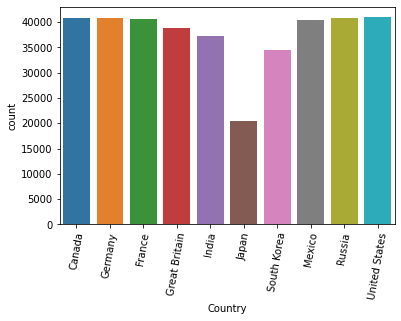

In [29]:
# Визуально распределение баллов каждой страны выглядит так:
# Мы видим, что Япония набрала суммарно набрала в 2 раза меньше баллов, чем любая другая страна
# Возможно, это связано с тем, что данные по Японии стали собирать позже, чем по другим странам
# Ниже проверим эту гипотезу
sns.countplot(x='Country', data=df_full)
plt.xticks(rotation=80);

In [30]:
# Действительно, данные трендов Японии собирались 127 дней, в то время как в других странах - 212 дней
print(df_full.groupby('Country')['trending_date'].max() - df_full.groupby('Country')['trending_date'].min())

Country
Canada          212 days
France          212 days
Germany         212 days
Great Britain   212 days
India           212 days
Japan           127 days
Mexico          212 days
Russia          212 days
South Korea     212 days
United States   212 days
Name: trending_date, dtype: timedelta64[ns]


In [31]:
# Проверим, есть ли сезонность.
# Для этого сначала добавим колонку год-месяц тренда
test = df_full['trending_date'].astype('str')
df_full['Year_month_int'] = test.str.replace('-?', '', regex=True).str[0:6]

In [32]:
df_full['Year_month_int'] = df_full['Year_month_int'].astype('str')

In [33]:
# Итого мы имеем информацию суммарно за 8 месяцев
print(df_full['Year_month_int'].nunique(), " месяцев")
print(df_full['Year_month_int'].unique())

8  месяцев
['201711' '201712' '201801' '201802' '201803' '201804' '201805' '201806']


## 2. Удаление дубликатов
<a id="2."></a>

### 2.1 Описание проблемы с дубликатами
<a id="2.1"></a>

In [36]:
# Для начала загрузим наши данные в базу данных, чтобы иметь возможность работать с ними с помощью SQL запросов.
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
df_full.to_sql('youtube', engine, index=False, if_exists='replace')

Для первого примера возьмем клип **Childish Gambino - This Is America (Official Video)**

In [35]:
query = """
SELECT video_id, title, Country, trending_date, views, likes, publish_date_no_tz
FROM youtube
WHERE video_id LIKE 'VYOjWnS4cMY'
ORDER BY trending_date
LIMIT 50
"""
pd.read_sql_query(query, engine)

video_id                                              title  \
0   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
1   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
2   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
3   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
4   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
5   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
6   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
7   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
8   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
9   VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
10  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
11  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
12  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
13  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
14  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
15  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
16  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
17  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
18  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
19  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
20  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
21  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
22  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
23  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
24  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
25  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
26  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
27  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
28  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
29  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
30  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
31  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
32  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
33  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
34  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
35  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
36  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
37  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
38  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
39  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
40  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
41  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
42  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
43  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
44  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
45  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
46  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
47  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
48  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
49  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   

          Country               trending_date      views    likes  \
0          Canada  2018-05-06 00:00:00.000000     546527   109193   
1          Mexico  2018-05-06 00:00:00.000000     546527   109235   
2          Russia  2018-05-06 00:00:00.000000     546527   109216   
3          Canada  2018-05-07 00:00:00.000000   14171087   801866   
4         Germany  2018-05-07 00:00:00.000000   14171087   801859   
5          France  201

Один и тот же ‘video_id’, дата попадания в тренды, страна, просмотры. Но лайки отличаются буквально на несколько штук. И отличается номер строки записи. Видимо, YouTube API по какой-то причине стянул одно и то же видео 2 раза в один и тот же день. А почему просмотры одинаковые в дубляжах, а лайки нет?
Когда видео стремительно набирает просмотры, бывает такое, что Ютуб замораживает на некоторое время просмотры. А статистика лайков иногда продолжает своевременно отображаться.

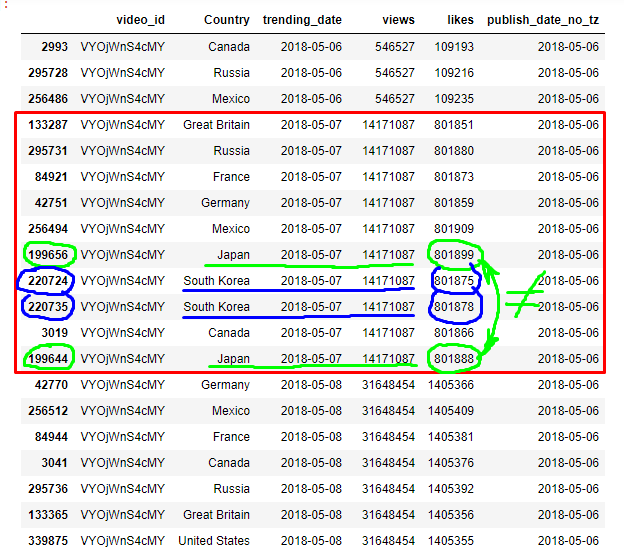

In [36]:
from PIL import Image
img = Image.open('data/pictures/stage_3/duplicates_in_the_dataset.png')
img

Также еще пример корейского бойзбенда. Клип **BTS (방탄소년단) 'FAKE LOVE' Official MV**

In [37]:
df_full[df_full['video_id'] == '7C2z4GqqS5E'][['video_id', 'Country', 'trending_date', 
                                'views', 'likes', 'publish_time_no_tz']].sort_values('trending_date', ascending=True).head(20)

video_id        Country trending_date     views    likes  \
3248    7C2z4GqqS5E         Canada    2018-05-19  39349927  3880074   
340272  7C2z4GqqS5E  United States    2018-05-19  39349927  3880071   
134215  7C2z4GqqS5E  Great Britain    2018-05-19  39349927  3880074   
42897   7C2z4GqqS5E        Germany    2018-05-19  39349927  3880074   
295835  7C2z4GqqS5E         Russia    2018-05-19  39349927  3880074   
256692  7C2z4GqqS5E         Mexico    2018-05-19  39349928  3880211   
85193   7C2z4GqqS5E         France    2018-05-19  39349927  3880074   
199774  7C2z4GqqS5E          Japan    2018-05-20  62796390  4470923   
220828  7C2z4GqqS5E    South Korea    2018-05-20  62796390  4470923   
220834  7C2z4GqqS5E    South Korea    2018-05-20  62796390  4470923   
256722  7C2z4GqqS5E         Mexico    2018-05-20  62796390  4470923   
256752  7C2z4GqqS5E         Mexico    2018-05-20  62796390  4470923   
295845  7C2z4GqqS5E         Russia    2018-05-20  62796390  4470923   
295858  7C2z4GqqS5E         Russia    2018-05-20  62796390  4470923   
340306  7C2z4GqqS5E  United States    2018-05-20  62796390  4470888   
199772  7C2z4GqqS5E          Japan    2018-05-20  62796390  4470923   
199771  7C2z4GqqS5E          Japan    2018-05-20  62796390  4470923   
199773  7C2z4GqqS5E          Japan    2018-05-20  62796390  4470923   
134289  7C2z4GqqS5E  Great Britain    2018-05-20  62796390  4470888   
85228   7C2z4GqqS5E         France    2018-05-20  62796390  4470923   

        publish_time_no_tz  
3248   2018-05-18 09:00:02  
340272 2018-05-18 09:00:02  
134215 2018-05-18 09:00:02  
42897  2018-05-18 09:00:02  
295835 2018-05-18 09:00:02  
256692 2018-05-18 09:00:02  
85193  2018-05-18 09:00:02  
199774 2018-05-18 09:00:02  
220828 2018-05-18 09:00:02  
220834 2018-05-18 09:00:02  
256722 2018-05-18 09:00:02  
256752 2018-05-18 09:00:02  
295845 2018-05-18 09:00:02  
295858 2018-05-18 09:00:02  
340306 2018-05-18 09:00:02  
199772 2018-05-18 09:00:02  
199771 2018-05-18 09:00:02  
199773 2018-05-18 09:00:02  
134289 2018-05-18 09:00:02  
85228  2018-05-18 09:00:02

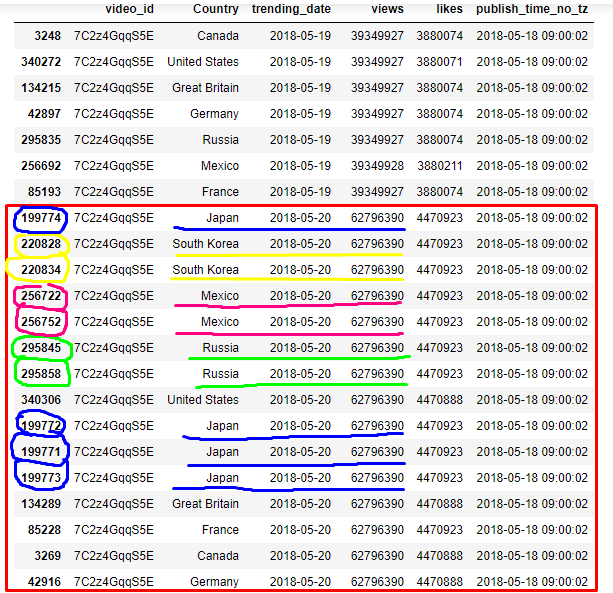

In [38]:
img = Image.open('data/pictures/stage_3/duplicates_korean_boys_band.png')
img

Одним из вариантов решения проблемы - можно создать "групповой" ключ путем соединения CONCAT() нескольких строк в одну. Конкретно - 'video_id', 'title', 'trending_date', 'country'. И потом сгруппируем по новосозданному ключу. В результате дубликаты удалятся.

In [39]:
df_korean_boys_band_duplicates = df_full[df_full['video_id'] == '7C2z4GqqS5E']
df_korean_boys_band_duplicates['new_id'] = df_korean_boys_band_duplicates['video_id'].str \
                        .cat(df_korean_boys_band_duplicates[['title', 'trending_date', 'Country']].astype('str'))

<ipython-input-39-e74147a322be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_korean_boys_band_duplicates['new_id'] = df_korean_boys_band_duplicates['video_id'].str \


Группируем строчки по новому ключу

In [40]:
df_korean_boys_band_duplicates.groupby('new_id')['new_id'].count()

new_id
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-19Canada           1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-19France           1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-19Germany          1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-19Great Britain    1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-19Mexico           1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-19Russia           1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-19United States    1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-20Canada           1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-20France           1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-20Germany          1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-20Great Britain    1
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-20Japan            4
7C2z4GqqS5EBTS (방탄소년단) 'FAKE LOVE' Official MV2018-05-20Mexico           2
7C2z4GqqS5EBTS (방탄

Видим, как дубляжи "схлопнулись".

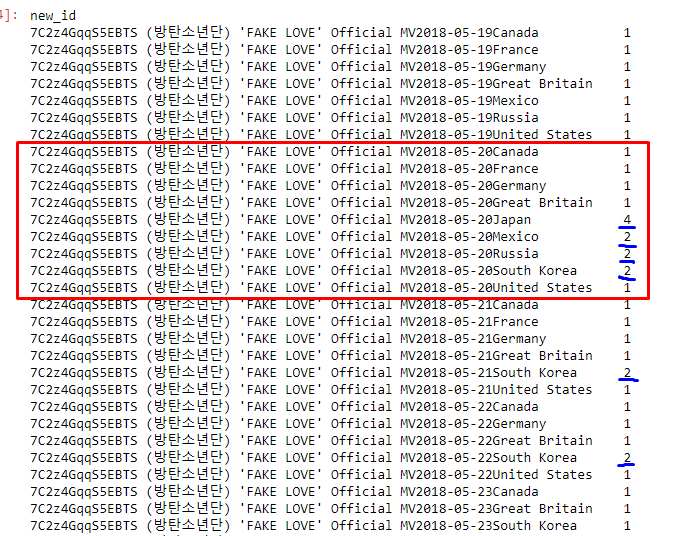

In [41]:
img = Image.open('data/pictures/stage_3/duplicates_korean_boys_band_no_duplicates.png')
img

### 2 проблема - есть видео, где неопределен 'video_id'. Там, где он неопределен вместо него стоит значение '#NAME?'
#### менее серьезная проблема, чем дубликаты, но все же может принести некоторые неприятности.

In [42]:
query = """
SELECT video_id, title, channel_title, trending_date, views, Country, publish_date_no_tz
FROM youtube
WHERE video_id = '#NAME?'
ORDER BY views DESC
LIMIT 10
"""
pd.read_sql_query(query, engine)

video_id                                              title  \
0   #NAME?              Maluma - El Préstamo (Official Video)   
1   #NAME?              Maluma - El Préstamo (Official Video)   
2   #NAME?              Maluma - El Préstamo (Official Video)   
3   #NAME?  PADMAN Official Trailer | Akshay Kumar | Sonam...   
4   #NAME?  PADMAN Official Trailer | Akshay Kumar | Sonam...   
5   #NAME?  PADMAN Official Trailer | Akshay Kumar | Sonam...   
6   #NAME?              Maluma - El Préstamo (Official Video)   
7   #NAME?  PADMAN Official Trailer | Akshay Kumar | Sonam...   
8   #NAME?  PADMAN Official Trailer | Akshay Kumar | Sonam...   
9   #NAME?  PADMAN Official Trailer | Akshay Kumar | Sonam...   

         channel_title               trending_date     views Country  \
0           MalumaVEVO  2018-03-14 00:00:00.000000  44726356  Mexico   
1           MalumaVEVO  2018-03-13 00:00:00.000000  39575633  Mexico   
2           MalumaVEVO  2018-03-12 00:00:00.000000  31870855  Mexico   
3  Sony Pictures India  2017-12-22 00:00:00.000000  28080774   India   
4  Sony Pictures India  2017-12-21 00:00:00.000000  26983244   India   
5  Sony Pictures India  2017-12-20 00:00:00.000000  25484419   India   
6           MalumaVEVO  2018-03-11 00:00:00.000000  24907224  Mexico   
7  Sony Pictures India  2017-12-19 00:00:00.000000  24065621   India   
8  Sony Pictures India  2017-12-18 00:00:00.000000  22497031   India   
9  Sony Pictures India  2017-12-17 00:00:00.000000  20620951   India   

           publish_date_no_tz  
0  2018-03-09 00:00:00.000000  
1  2018-03-09 00:00:00.000000  
2  2018-03-09 00:00:00.000000  
3  2017-12-15 00:00:00.000000  
4  2017-12-15 00:00:00.000000  
5  2017-12-15 00:00:00.000000  
6  2018-03-09 00:00:00.000000  
7  2017-12-15 00:00:00.000000  
8  2017-12-15 00:00:00.000000  
9  2017-12-15 00:00:00.000000

In [43]:
query = """
SELECT 
    country
    , count(*) as count_rows_with_video_id_error
    , count(DISTINCT title) as unique_videos_with_error_video_id
    , sum(views) as sum_of_trend_views_error_video_id
    , sum(sum(views)) OVER () as total_trend_views_error_video_id
FROM youtube
WHERE video_id = '#NAME?'
GROUP BY country
ORDER BY views DESC
"""
pd.read_sql_query(query, engine)

Country  count_rows_with_video_id_error  \
0  South Korea                             443   
1       Mexico                             516   
2        India                             511   
3        Japan                             282   
4       Russia                             560   

   unique_videos_with_error_video_id  sum_of_trend_views_error_video_id  \
0                                217                          113894937   
1                                440                          268038282   
2                                214                          765625280   
3                                183                           57692467   
4                                485                           96339901   

   total_trend_views_error_video_id  
0                        1301590867  
1                        1301590867  
2                        1301590867  
3                        1301590867  
4                        1301590867

Всего video_id содержит 2312 строчек ошибкой '#NAME?'. Что при работе, где необходимо будет сгруппировать по video_id, может несколько исказить результаты.   
Нужно скорректировать 1505 video_id

In [44]:
query = """
SELECT
    count(*) as count_rows
    , count(DISTINCT video_id) as unique_video_id
    , count(DISTINCT title) as unique_title
    , count(DISTINCT title) as video_ids_that_need_to_be_corrected
FROM youtube
WHERE video_id = '#NAME?'
"""
pd.read_sql_query(query, engine)

count_rows  unique_video_id  unique_title  \
0        2312                1          1505   

   video_ids_that_need_to_be_corrected  
0                                 1505

Логика корректировки - следующая: соединим video_id и title в одну колонку. В результате получим 1505 новых video_id, которые затем вставим вместо значения "#NAME?"

In [45]:
# "||" в sqlite - аналог функции CONCAT() в PostgreSQL
query = """
SELECT
   count(DISTINCT video_id || title) as new_video_ids
FROM youtube
WHERE video_id = '#NAME?'
"""
pd.read_sql_query(query, engine)

new_video_ids
0           1505

Кроме '#NAME?' имеется еще значение '#VALUE!', которое также обозначает ошибку определения video_id. Всего таких значений - 7. Вышеуказанный способ для '#NAME?' решит и эту проблему.

In [46]:
query = """
SELECT video_id, title, channel_title, trending_date, views, Country, publish_date_no_tz
FROM youtube
WHERE video_id = '#VALUE!'
"""
pd.read_sql_query(query, engine)

video_id                                              title  \
0  #VALUE!  FARZAND | Official Teaser | Upcoming Marathi M...   
1  #VALUE!  FARZAND | Official Teaser | Upcoming Marathi M...   
2  #VALUE!  FARZAND | Official Teaser | Upcoming Marathi M...   
3  #VALUE!  ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...   
4  #VALUE!  ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...   
5  #VALUE!  ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...   
6  #VALUE!  ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...   

     channel_title               trending_date   views Country  \
0  Rajshri Marathi  2018-03-19 00:00:00.000000  111087   India   
1  Rajshri Marathi  2018-03-20 00:00:00.000000  156320   India   
2  Rajshri Marathi  2018-03-21 00:00:00.000000  206364   India   
3          Rahasya  2018-03-09 00:00:00.000000   68027   India   
4          Rahasya  2018-03-10 00:00:00.000000  143872   India   
5          Rahasya  2018-03-11 00:00:00.000000  233118   India   
6          Rahasya  2018-03-12 00:00:00.000000  258163   India   

           publish_date_no_tz  
0  2018-03-18 00:00:00.000000  
1  2018-03-18 00:00:00.000000  
2  2018-03-18 00:00:00.000000  
3  2018-03-08 00:00:00.000000  
4  2018-03-08 00:00:00.000000  
5  2018-03-08 00:00:00.000000  
6  2018-03-08 00:00:00.000000

### 2.2 Решение проблемы с дубликатами и неопределенными video_id
<a id="2.2"></a>

### 2.2.1 Решаем проблему с неопределенными video_id
<a id="2.2.1"></a>

Вырезаем строки, которые содержат в качестве video_id '#VALUE!' или '#NAME?'. И вставляем в пустую таблицу.

In [47]:
df_duplicate_correction = df_full[(df_full['video_id'] == '#NAME?') | (df_full['video_id'] == '#VALUE!')]

In [48]:
# 2319 строчек и 21 столбец
df_duplicate_correction.shape

(2319, 20)

In [49]:
df_duplicate_correction.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'category', 'publish_time_no_tz', 'publish_date_no_tz',
       'Country', 'points', 'Year_month_int'],
      dtype='object')

Формируем новый столбец с помощью сцепки 'video_id' и 'title'

In [50]:
df_duplicate_correction['new_id'] = df_duplicate_correction['video_id'].str \
                                            .cat(df_duplicate_correction[['title']].astype('str'))

<ipython-input-50-c8a884a8779e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate_correction['new_id'] = df_duplicate_correction['video_id'].str \


In [51]:
df_duplicate_correction.tail(1)

video_id trending_date  \
334972   #NAME?    2018-05-22   

                                                    title channel_title  \
334972  Мужское / Женское - Папа за полмиллиона. Выпус...  Первый канал   

                                                     tags   views  likes  \
334972  Семья|"помощь"|"родители"|"семья"|"предательст...  180233    610   

        dislikes  comment_count  \
334972       179            392   

                                        thumbnail_link  ...  ratings_disabled  \
334972  https://i.ytimg.com/vi/-f7pF0PBzg4/default.jpg  ...                 0   

        video_error_or_removed  \
334972                       0   

                                              description category  \
334972  Бывшие супруги Ирина и Виктор Сысоевы из Сысер...    Shows   

        publish_time_no_tz publish_date_no_tz Country points  Year_month_int  \
334972 2018-05-21 15:10:54         2018-05-21  Russia      1          201805   

                                                   new_id  
334972  #NAME?Мужское / Женское - Папа за полмиллиона....  

[1 rows x 21 columns]

In [52]:
# Пример нового длинного ключа
df_duplicate_correction['new_id'].tail()

334829    #NAME?Вечерний Ургант. Сергей Безруков и Антон...
334857    #NAME?Мужское / Женское - Моя ужасная история....
334891    #NAME?На самом деле - «Я - настоящий отец ребе...
334915    #NAME?Вечерний Ургант. Валерий Сюткин , группа...
334972    #NAME?Мужское / Женское - Папа за полмиллиона....
Name: new_id, dtype: object

Чтобы наш ключ был короче и выполнял свои функции - сгенерируем новый ключ.

In [53]:
# 1507 уникальных значений нового длинного ключа
df_duplicate_correction['new_id'].nunique()

1507

Теперь сгенерируем новый короткий 14-значный ключ

In [54]:
# Формируем пустой словарь (может содержать только 1 ключ)
id_dict = {}

# Создаем алфавит, из которого будем "лепить" ключ путем случайного выбора из строки. Заворачиваем алфавит в numpy array.
# Библиотеки pandas и numpy написаны на языке C, поэтому в отличии от Python - в десятки раз быстрее.
alphabet = np.array(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890'))

# Циклом пробегаемся по уникальному списку длинных ключей, которые мы получили путем сцепки. 
# И вставляем в наш словарь
for i in df_duplicate_correction['new_id'].unique():
    a = np.random.choice(alphabet, size=14)
    a = a.tolist()
    a = ''.join(a)
    id_dict.update({i: a})

In [55]:
# Список 'длинный ключ': 'случайно сгенерированный короткий ключ'
count = 0
for i in id_dict:
    count += 1
    if count < 10:
        print(i, ": ", id_dict[i])

#NAME?Sucha Yaar - JATTAN DA PROGRAM [Official Teaser] | Art Attack | Upcoming Beat Punjabi Song 2017 :  p2ELABMYPlHwvr
#NAME?DILL TON BLACCK Video Song | Jassi Gill Feat. Badshah | Jaani, B Praak | New Song 2018 :  q37feQyNZXk0FL
#NAME?Yentha Sakkagunnaave Lyrical - Rangasthalam Songs | Ram Charan, Samantha, Devi Sri Prasad :  smaLT5mTVq1fg9
#NAME?Ranga Ranga Rangasthalaana Lyrical - Rangasthalam Songs - Ram Charan, Devi Sri Prasad :  BPIAthEGbMVUpK
#NAME?Most Wanted Abbayi Lyrical || MLA Movie Songs || Nandamuri Kalyanram, Kajal Aggarwal || Mani Sharma :  WqrSqyWNLLJUMl
#NAME?Kaali Hummer (Official Video) Maninder Buttar | Happy Raikoti | Sukh Sanghera  | White Hill Music :  rdwwSfYF6TALVW
#NAME?BEWAFA TU - GURI  (Full Song) Satti Dhillon | Latest Punjabi Sad Song 2018 | Geet MP3 :  MFk9eO34fKQwfY
#NAME?Soniye Dil Nayi Video Song | Baaghi 2 | Tiger Shroff | Disha Patani | Ankit Tiwari |Shruti Pathak :  l4H9hzlbHbNUSe
#NAME?Jodi Teri Meri | Official Video | Jassi Gill | Desi Crew | La

In [56]:
# Вот так отдельно работает генератор случайных слов из списка букв и знаков
alphabet = np.array(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890'))
a = np.random.choice(alphabet, size=14)
a = a.tolist()
a = ''.join(a)
a

'vyXL7sTEA3WP1V'

In [57]:
# Теперь превращаем наш словарь в таблицу-справочник, откуда впоследующем будем брать короткие ключи путем JOIN
id_dict_df = pd.DataFrame(id_dict.items(), columns=['long_key', 'short_key'])
id_dict_df.head()

long_key       short_key
0  #NAME?Sucha Yaar - JATTAN DA PROGRAM [Official...  p2ELABMYPlHwvr
1  #NAME?DILL TON BLACCK Video Song | Jassi Gill ...  q37feQyNZXk0FL
2  #NAME?Yentha Sakkagunnaave Lyrical - Rangastha...  smaLT5mTVq1fg9
3  #NAME?Ranga Ranga Rangasthalaana Lyrical - Ran...  BPIAthEGbMVUpK
4  #NAME?Most Wanted Abbayi Lyrical || MLA Movie ...  WqrSqyWNLLJUMl

In [58]:
df_duplicate_correction.head(1)

video_id trending_date  \
161548   #NAME?    2017-11-30   

                                                    title       channel_title  \
161548  Sucha Yaar - JATTAN DA PROGRAM [Official Tease...  Art Attack Records   

                                                     tags  views  likes  \
161548  INDER CHAHAL|"DALJIT DOSANJH"|"AMMY VIRK"|"MAN...  18580    475   

        dislikes  comment_count  \
161548        19             70   

                                        thumbnail_link  ...  ratings_disabled  \
161548  https://i.ytimg.com/vi/-yJpygjq7c8/default.jpg  ...                 0   

        video_error_or_removed  \
161548                       0   

                                              description category  \
161548  Presenting the Official Teaser ofJATTAN DA PRO...    Music   

        publish_time_no_tz publish_date_no_tz Country points  Year_month_int  \
161548 2017-11-28 13:41:05         2017-11-28   India      1          201711   

                                                   new_id  
161548  #NAME?Sucha Yaar - JATTAN DA PROGRAM [Official...  

[1 rows x 21 columns]

In [59]:
# INNER JOIN
df_duplicate_correction_short_key = 0
df_duplicate_correction_short_key = pd.merge(df_duplicate_correction, id_dict_df, left_on='new_id', right_on='long_key')

In [60]:
# Вот так выглядит наш датасет с новым коротким ключем
df_duplicate_correction_short_key[['short_key', 'title', 'channel_title', 'trending_date', 'views', 'Country']].head(20)

short_key                                              title  \
0   p2ELABMYPlHwvr  Sucha Yaar - JATTAN DA PROGRAM [Official Tease...   
1   p2ELABMYPlHwvr  Sucha Yaar - JATTAN DA PROGRAM [Official Tease...   
2   q37feQyNZXk0FL  DILL TON BLACCK Video Song | Jassi Gill Feat. ...   
3   q37feQyNZXk0FL  DILL TON BLACCK Video Song | Jassi Gill Feat. ...   
4   q37feQyNZXk0FL  DILL TON BLACCK Video Song | Jassi Gill Feat. ...   
5   smaLT5mTVq1fg9  Yentha Sakkagunnaave Lyrical - Rangasthalam So...   
6   smaLT5mTVq1fg9  Yentha Sakkagunnaave Lyrical - Rangasthalam So...   
7   smaLT5mTVq1fg9  Yentha Sakkagunnaave Lyrical - Rangasthalam So...   
8   smaLT5mTVq1fg9  Yentha Sakkagunnaave Lyrical - Rangasthalam So...   
9   smaLT5mTVq1fg9  Yentha Sakkagunnaave Lyrical - Rangasthalam So...   
10  smaLT5mTVq1fg9  Yentha Sakkagunnaave Lyrical - Rangasthalam So...   
11  smaLT5mTVq1fg9  Yentha Sakkagunnaave Lyrical - Rangasthalam So...   
12  BPIAthEGbMVUpK  Ranga Ranga Rangasthalaana Lyrical - Rangastha...   
13  BPIAthEGbMVUpK  Ranga Ranga Rangasthalaana Lyrical - Rangastha...   
14  BPIAthEGbMVUpK  Ranga Ranga Rangasthalaana Lyrical - Rangastha...   
15  BPIAthEGbMVUpK  Ranga Ranga Rangasthalaana Lyrical - Rangastha...   
16  BPIAthEGbMVUpK  Ranga Ranga Rangasthalaana Lyrical - Rangastha...   
17  BPIAthEGbMVUpK  Ranga Ranga Rangasthalaana Lyrical - Rangastha...   
18  BPIAthEGbMVUpK  Ranga Ranga Rangasthalaana Lyrical - Rangastha...   
19  WqrSqyWNLLJUMl  Most Wanted Abbayi Lyrical || MLA Movie Songs ...   

              channel_title trending_date    views Country  
0        Art Attack Records    2017-11-30    18580   India  
1        Art Attack Records    2017-12-01    41874   India  
2                  T-Series    2018-01-25  3455624   India  
3                  T-Series    2018-01-26  6019930   India  
4                  T-Series    2018-01-27  8151118   India  
5   Lahari Music | T-Series    2018-02-14  2555559   India  
6   Lahari Music | T-Series    2018-02-15  4494981   India  
7   Lahari Music | T-Series    2018-02-16  5020485   India  
8   Lahari Music | T-Series    2018-02-17  5752277   India  
9   Lahari Music | T-Series    2018-02-18  6388386   India  
10  Lahari Music | T-Series    2018-02-19  6878437   India  
11  Lahari Music | T-Series    2018-02-20  7335213   India  
12  Lahari Music | T-Series    2018-03-03  2260328   India  
13  Lahari Music | T-Series    2018-03-03  2260328   India  
14  Lahari Music | T-Series    2018-03-04  3390403   India  
15  Lahari Music | T-Series    2018-03-05  4014173   India  
16  Lahari Music | T-Series    2018-03-06  4328477   India  
17  Lahari Music | T-Series    2018-03-07  4694970   India  
18  Lahari Music | T-Series    2018-03-08  4981660   India  
19             Aditya Music    2018-03-06   444418   India

In [61]:
df_duplicate_correction_short_key.head(1)

video_id trending_date                                              title  \
0   #NAME?    2017-11-30  Sucha Yaar - JATTAN DA PROGRAM [Official Tease...   

        channel_title                                               tags  \
0  Art Attack Records  INDER CHAHAL|"DALJIT DOSANJH"|"AMMY VIRK"|"MAN...   

   views  likes  dislikes  comment_count  \
0  18580    475        19             70   

                                   thumbnail_link  ...  \
0  https://i.ytimg.com/vi/-yJpygjq7c8/default.jpg  ...   

                                         description  category  \
0  Presenting the Official Teaser ofJATTAN DA PRO...     Music   

   publish_time_no_tz publish_date_no_tz Country points Year_month_int  \
0 2017-11-28 13:41:05         2017-11-28   India      1         201711   

                                              new_id  \
0  #NAME?Sucha Yaar - JATTAN DA PROGRAM [Official...   

                                            long_key       short_key  
0  #NAME?Sucha Yaar - JATTAN DA PROGRAM [Official...  p2ELABMYPlHwvr  

[1 rows x 23 columns]

In [62]:
# Теперь выкинем ненужные колонки
df_duplicate_correction_short_key = df_duplicate_correction_short_key.drop(['video_id', 'new_id', 'long_key'], axis=1)

In [63]:
# Переименовываем 'short_key' на 'video_id'
df_duplicate_correction_short_key.rename(columns={'short_key': 'video_id'}, inplace=True)

In [64]:
df_duplicate_correction_short_key.columns

Index(['trending_date', 'title', 'channel_title', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'category',
       'publish_time_no_tz', 'publish_date_no_tz', 'Country', 'points',
       'Year_month_int', 'video_id'],
      dtype='object')

In [65]:
df_without_name_value = df_full[(df_full['video_id'] != '#NAME?') & (df_full['video_id'] != '#VALUE!')]

In [66]:
print(df_full.shape[0])
print(df_without_name_value.shape[0])
print(df_duplicate_correction_short_key.shape[0])

375942
373623
2319


In [67]:
# UNION ALL
df_union_all = pd.concat([df_without_name_value, df_duplicate_correction_short_key])

In [68]:
df_union_all.shape

(375942, 20)

In [69]:
# 0 значений '#NAME?' или '#VALUE!' в колонке 'video_id'
# При все тех же 375942 строчках и 21 колонке
print(df_union_all[(df_union_all['video_id'] == '#NAME?') | (df_union_all['video_id'] == '#VALUE!')].shape[0])
print("Исходный датасет: ", df_full.shape)
print("Обработанный датасет: ", df_union_all.shape)

0
Исходный датасет:  (375942, 20)
Обработанный датасет:  (375942, 20)


### 2.2.2 Решаем проблему с дубликатами строчек
<a id="2.2.2"></a>

In [70]:
# Сцепляем 'video_id', 'title', 'trending_date', 'Country' в одну строку.
df_union_all['new_id'] = df_union_all['video_id'].str.cat(df_union_all[['title', 'trending_date', 'Country']].astype('str'))

In [71]:
df_union_all['new_id'].head()

0    n1WpP7iowLcEminem - Walk On Water (Audio) ft. ...
1    2Vv-BfVoq4gEd Sheeran - Perfect (Official Musi...
2    H1KBHFXm2Bg21 Savage - Bank Account (Official ...
3    7MxiQ4v0EnEDaang ( Full Video ) | Mankirt Aula...
4    j67FgNEvyh8Telefoon || Babbu Maan || Promo || ...
Name: new_id, dtype: object

In [72]:
df_union_all.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'category', 'publish_time_no_tz', 'publish_date_no_tz',
       'Country', 'points', 'Year_month_int', 'new_id'],
      dtype='object')

In [73]:
# Группируем по сцепке 'new_id', тем самым, удаляя дубликаты
df_union_all_grouped = df_union_all.groupby('new_id').agg({'video_id': np.unique, 'trending_date': np.max, 'title': np.unique, 
                                'channel_title': np.unique, 'tags': np.unique, 'views': np.max,
       'likes': np.max, 'dislikes': np.max, 'comment_count': np.max, 'thumbnail_link': np.unique,
       'comments_disabled': np.max, 'ratings_disabled': np.max, 'video_error_or_removed': np.max,
       'description': np.unique, 'category': np.unique, 'publish_time_no_tz': np.max, 'publish_date_no_tz': np.max,
       'Country': np.unique, 'points': np.max, 'Year_month_int': np.max})

In [74]:
# Дубликаты в данных составляли 13230 / 375942 = 3,5%
print("Строки исходного датасета: ", df_full.shape[0])
print("Строки обработанного датасета: ", df_union_all_grouped.shape[0])
print("Удаленные дубликаты: ", df_full.shape[0] - df_union_all_grouped.shape[0])

Строки исходного датасета:  375942
Строки обработанного датасета:  362712
Удаленные дубликаты:  13230


### 2.2.3 Проверяем результат нашей работы на дубликаты
<a id="2.2.3"></a>

In [75]:
# Обновляем индекс в виде 0,1,2 ...
df_union_all_grouped = df_union_all_grouped.reset_index()

In [76]:
# Удаляем колонку 'new_id'
df_union_all_grouped.drop('new_id', axis=1, inplace=True)

In [77]:
df_union_all_grouped[df_union_all_grouped['video_id'] == 'VYOjWnS4cMY'][['video_id', 'Country', 'trending_date', 
                                'views', 'likes', 'publish_time_no_tz']].sort_values('trending_date', ascending=True).head(15)

video_id        Country trending_date     views    likes  \
183640  VYOjWnS4cMY         Canada    2018-05-06    546527   109193   
183641  VYOjWnS4cMY         Mexico    2018-05-06    546527   109235   
183642  VYOjWnS4cMY         Russia    2018-05-06    546527   109216   
183649  VYOjWnS4cMY         Russia    2018-05-07  14171087   801880   
183648  VYOjWnS4cMY         Mexico    2018-05-07  14171087   801909   
183647  VYOjWnS4cMY          Japan    2018-05-07  14171087   801899   
183650  VYOjWnS4cMY    South Korea    2018-05-07  14171087   801878   
183645  VYOjWnS4cMY        Germany    2018-05-07  14171087   801859   
183644  VYOjWnS4cMY         France    2018-05-07  14171087   801873   
183643  VYOjWnS4cMY         Canada    2018-05-07  14171087   801866   
183646  VYOjWnS4cMY  Great Britain    2018-05-07  14171087   801851   
183651  VYOjWnS4cMY         Canada    2018-05-08  31648454  1405376   
183652  VYOjWnS4cMY         France    2018-05-08  31648454  1405381   
183653  VYOjWnS4cMY        Germany    2018-05-08  31648454  1405366   
183654  VYOjWnS4cMY  Great Britain    2018-05-08  31648454  1405356   

        publish_time_no_tz  
183640 2018-05-06 04:00:07  
183641 2018-05-06 04:00:07  
183642 2018-05-06 04:00:07  
183649 2018-05-06 04:00:07  
183648 2018-05-06 04:00:07  
183647 2018-05-06 04:00:07  
183650 2018-05-06 04:00:07  
183645 2018-05-06 04:00:07  
183644 2018-05-06 04:00:07  
183643 2018-05-06 04:00:07  
183646 2018-05-06 04:00:07  
183651 2018-05-06 04:00:07  
183652 2018-05-06 04:00:07  
183653 2018-05-06 04:00:07  
183654 2018-05-06 04:00:07

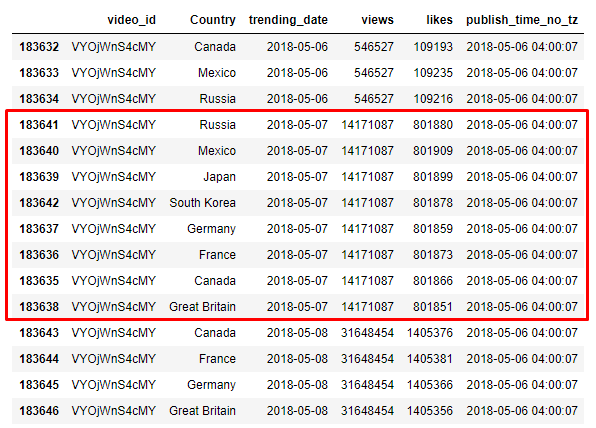

In [78]:
img = Image.open('data/pictures/stage_3/no_duplicates_this_is_America.png')
img

Клип бойзбенда **BTS (방탄소년단) 'FAKE LOVE' Official MV.** Нет дубликатов

In [79]:
df_union_all_grouped[df_union_all_grouped['video_id'] == '7C2z4GqqS5E'][['video_id', 'Country', 'trending_date', 
                                'views', 'likes', 'publish_time_no_tz']].sort_values('trending_date', ascending=True).head(20)

video_id        Country trending_date     views    likes  \
44402  7C2z4GqqS5E         Canada    2018-05-19  39349927  3880074   
44403  7C2z4GqqS5E         France    2018-05-19  39349927  3880074   
44404  7C2z4GqqS5E        Germany    2018-05-19  39349927  3880074   
44405  7C2z4GqqS5E  Great Britain    2018-05-19  39349927  3880074   
44406  7C2z4GqqS5E         Mexico    2018-05-19  39349928  3880211   
44407  7C2z4GqqS5E         Russia    2018-05-19  39349927  3880074   
44408  7C2z4GqqS5E  United States    2018-05-19  39349927  3880071   
44417  7C2z4GqqS5E  United States    2018-05-20  62796390  4470888   
44416  7C2z4GqqS5E    South Korea    2018-05-20  62796390  4470923   
44415  7C2z4GqqS5E         Russia    2018-05-20  62796390  4470923   
44414  7C2z4GqqS5E         Mexico    2018-05-20  62796390  4470923   
44413  7C2z4GqqS5E          Japan    2018-05-20  62796390  4470923   
44412  7C2z4GqqS5E  Great Britain    2018-05-20  62796390  4470888   
44411  7C2z4GqqS5E        Germany    2018-05-20  62796390  4470888   
44410  7C2z4GqqS5E         France    2018-05-20  62796390  4470923   
44409  7C2z4GqqS5E         Canada    2018-05-20  62796390  4470888   
44418  7C2z4GqqS5E         Canada    2018-05-21  65396157  4750254   
44419  7C2z4GqqS5E         France    2018-05-21  65396157  4750254   
44420  7C2z4GqqS5E        Germany    2018-05-21  65396157  4750254   
44421  7C2z4GqqS5E  Great Britain    2018-05-21  65396157  4750245   

       publish_time_no_tz  
44402 2018-05-18 09:00:02  
44403 2018-05-18 09:00:02  
44404 2018-05-18 09:00:02  
44405 2018-05-18 09:00:02  
44406 2018-05-18 09:00:02  
44407 2018-05-18 09:00:02  
44408 2018-05-18 09:00:02  
44417 2018-05-18 09:00:02  
44416 2018-05-18 09:00:02  
44415 2018-05-18 09:00:02  
44414 2018-05-18 09:00:02  
44413 2018-05-18 09:00:02  
44412 2018-05-18 09:00:02  
44411 2018-05-18 09:00:02  
44410 2018-05-18 09:00:02  
44409 2018-05-18 09:00:02  
44418 2018-05-18 09:00:02  
44419 2018-05-18 09:00:02  
44420 2018-05-18 09:00:02  
44421 2018-05-18 09:00:02

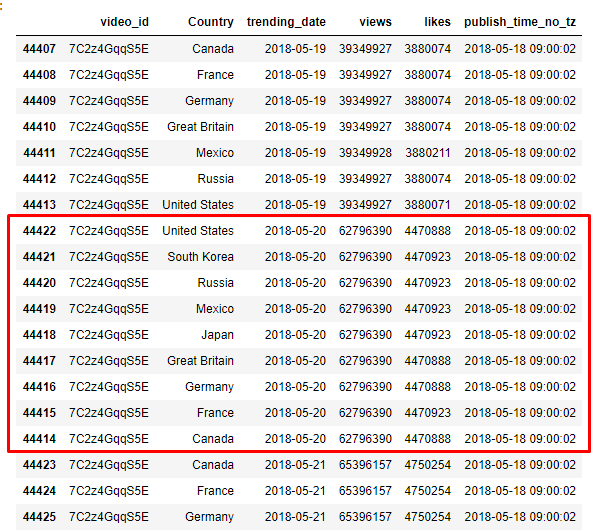

In [80]:
img = Image.open('data/pictures/stage_3/boys_band_no_duplicates.png')
img

In [81]:
# Выгружаем обработанный датасет в .csv файл

#df_union_all_grouped.to_csv \
#(r'C:\Users\b\Data_Science\Resume\Data_Analyst\df_union_all_grouped_no_duplicates_27_02_2021.csv', 
 #index = False, header=True)

## 3. Ответы на вопросы сотрудников из отдела маркетинга
<a id="3."></a>

In [4]:
# Загружаем наш обработанный датасет уже без дубликатов
df_no_duplicates = pd.read_csv('df_union_all_grouped_no_duplicates_27_02_2021.csv')

In [5]:
df_no_duplicates.head(2)

video_id        trending_date  \
0  --1skHapGUc  2018-02-10 00:00:00   
1  --2K8l6BWfw  2018-03-06 00:00:00   

                                               title  channel_title  \
0  SI TE RÍES, PIERDES (NIVEL ASIÁTICO) #51 Los M...   TheChacal547   
1                   La Relève #2 : Jessica Rodrigues  Georgette Mag   

                                                tags  views  likes  dislikes  \
0  Videos de Risa|"Si te ries pierdes"|"videos gr...  30914    483        77   
1  Jessica Rodrigues"|"jumping"|"horse"|"cheval"|...   4822    694         4   

   comment_count                                  thumbnail_link  ...  \
0             81  https://i.ytimg.com/vi/--1skHapGUc/default.jpg  ...   
1             34  https://i.ytimg.com/vi/--2K8l6BWfw/default.jpg  ...   

   ratings_disabled  video_error_or_removed  \
0                 0                       0   
1                 0                       0   

                                         description        category  \
0  Video para partirse de risa! pero cuidado, int...   Entertainment   
1  Retrouve-nous sur ➼ http://www.georgettemag.co...  Pets & Animals   

    publish_time_no_tz   publish_date_no_tz Country points  Year_month_int  \
0  2018-02-09 19:04:43  2018-02-09 00:00:00  Mexico      1          201802   
1  2018-03-05 13:37:34  2018-03-05 00:00:00  France      1          201803   

   days_since_publish  
0                   1  
1                   1  

[2 rows x 21 columns]

### 3.1  Какие факторы влияют на попадание видео в тренды
<a id="3.1"></a>

Поскольку одно и то же видео может держаться в трендах несколько дней подряд, для анализа корреляции нам нужно сгруппировать каждое видео по 'video_id', выводя при этом максимальные просмотры, лайки, дизлайки и сумму очков.

In [24]:
df_grouped_video_id = df_no_duplicates.groupby('video_id').agg({'video_id': np.unique, 'views': np.max, 
                                                    'likes': np.max, 'dislikes': np.max, 'comment_count': np.max, 
                                                    'comments_disabled': np.max, 'ratings_disabled': np.max, 
                                                    'video_error_or_removed': np.max, 'points': np.sum})

In [25]:
df_grouped_video_id.head()

video_id   views  likes  dislikes  comment_count  \
video_id                                                           
--1skHapGUc  --1skHapGUc   30914    483        77             81   
--2K8l6BWfw  --2K8l6BWfw    4822    694         4             34   
--45ws7CEN0  --45ws7CEN0  309197   3837       516            278   
--6vcer7XYQ  --6vcer7XYQ  414012   2161       331            416   
--728h8mnDY  --728h8mnDY   39535   2573        51            269   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
--1skHapGUc                  0                 0                       0   
--2K8l6BWfw                  0                 0                       0   
--45ws7CEN0                  0                 0                       0   
--6vcer7XYQ                  0                 0                       0   
--728h8mnDY                  0                 0                       0   

             points  
video_id             
--1skHapGUc       1  
--2K8l6BWfw       1  
--45ws7CEN0       3  
--6vcer7XYQ       3  
--728h8mnDY       2

**Введем следующие понятия:** 

**0 - 0,3** - очень слабая корреляция  
**0,3 - 0,5** - слабая корреляция  
**0,5 - 0,7** - средняя корреляция  
**0,7 - 0,9** - высокая корреляция  
**0,9 - 1** - очень высокая корреляция

Как мы видим, если брать разрез по всем странам, у попадания в тренды (количество очков) и лайков/просмотров наблюдается слабая корреляция.  
По соотношению лайки/просмотры, комментарии/лайки - высокая корреляция  
По соотношению дизлайки/комментарии - средняя корреляция  
По соотношению просмотры/комментарии, дизлайки/лайки, просмотры/дизлайки - слабая корреляция  

Какой можно сделать из этого вывод - **чем больше видео набирает просмотров, и лайков, тем более высокая вероятность попадания видео в тренды** (относительно других переменых). Но с одной поправкой, корреляция - это не причинно-следственная связь. Корреляция просто показывает, что с ростом одной переменной растет вторая переменная. И рости она может по причине некой третьей переменной (или фактора), которая как раз и ВЛИЯЕТ на обе.  

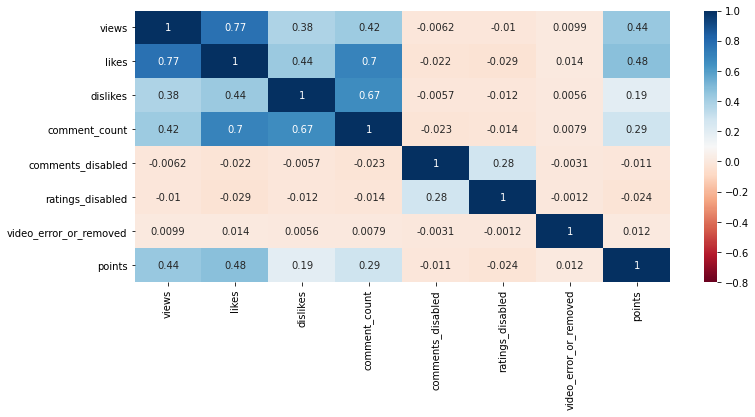

In [26]:
plt.figure(figsize=(12, 5))
sns.heatmap(df_grouped_video_id.corr(), annot=True, cmap='RdBu', vmin=-0.8);

### 3.2 Каковы вкусовые предпочтения жителей разных стран?
<a id="3.2"></a>

Мы видим на графике, что вкусовые предпочтения жителей разных стран где-то весьма разнообразны, а где-то сходятся.   
Например, в **Британии** наиболее востребована категория "Музыка" (35% всех трендовых позиций).  
В **Индии** - наиболее высокий процент категории "Развлечения"(45%) среди всех стран.   
**Южная Корея** выделяется среди других стран своей заинтересованностью в "Новостях и политике" (в среднем процент заинтересованности по этой категории в 2 раза выше, чем в других странах - 22%).  
В **России** людям наиболее интересна тема "Люди и блоги"(25%).  
А вот **США, Канада, Германия, Мексика, Индия, Япония** характеризуются довольно высокой потребностью в развлекательном контенте.  
Наиболее аполитичны и отстраненны от новостей - Япония (7%), Британия (3%), США (6%), Германия (7%)

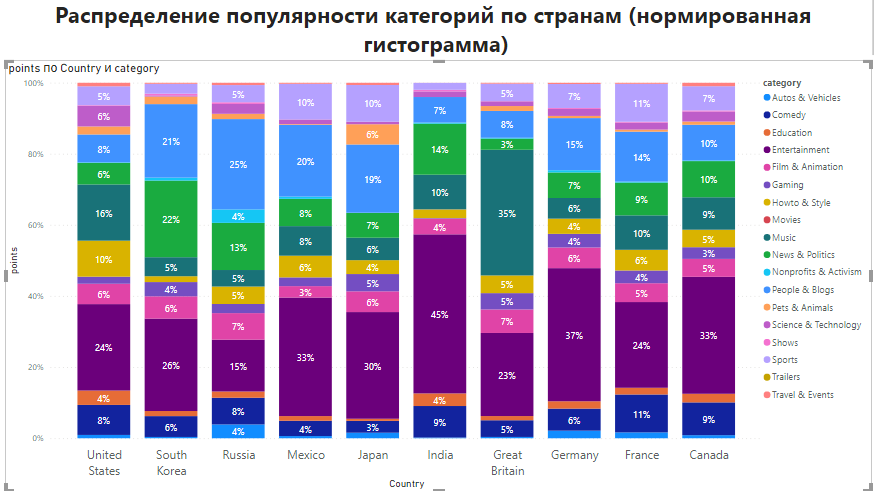

In [6]:
img = Image.open('data/pictures/no_duplicates/popularity_by_country.png')
img

На основании этих данных попробуем составить портрет жителя отдельной страны. Например, возьмем Россию. Для того, чтобы описать портрет нам необходимо определить некую "норму" - среднее значение среди всех стран. И каждую категорию отдельной страны мы будем сравнивать со средним значением. При подсчете среднего значения всех стран исключим рассмариваемую страну, чтобы она не искажала результат. Для удобства будем использовать запросы SQL, которые будем отправлять с помощью библиотеки SQLAlchemy. Также такое можно реализовать в PowerBI при помощи DAX формул.

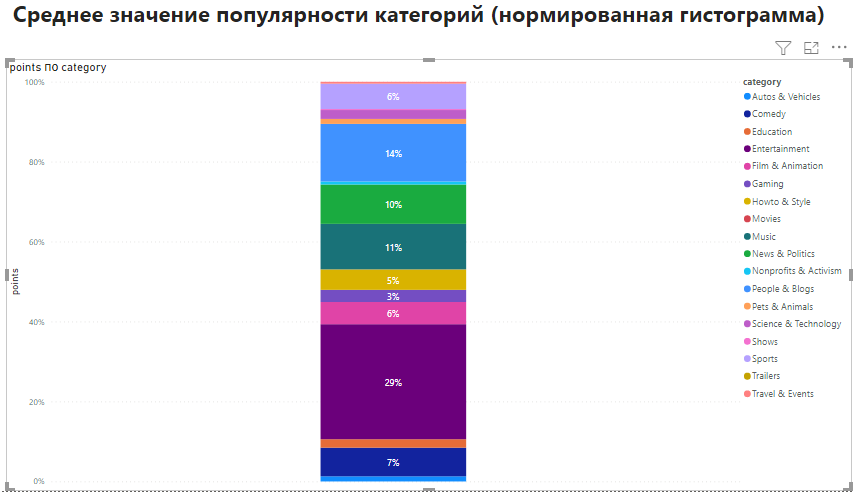

In [12]:
img = Image.open('data/pictures/no_duplicates/average_category_popularity.png')
img

### 3.3 Как различаются вкусовые предпочтения россиян и жителей других стран (в среднем)
<a id="3.3"></a>

In [37]:
# Создаем таблицу 'youtube' в базе данных. База данных будет загружена в оперативную память.
# Если бы была огромная таблица - тогда сохранил бы базу данных на жесткий диск.
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

df_no_duplicates.to_sql('youtube', engine, index=False, if_exists='replace')

На основании запроса получается, что житель России:

1. Русские практически в 3 раза более заинтересованы в теме "Авто и транспорт", чем в среднем жители других стран
2. К жанру "Юмор" русский относится также как и жители других стран
3. А вот к категории "Образование" русский заинтересован в 2 раза меньше чем пользователь Youtube других стран
4. Также в жанре "Развлечения" русские в 2 раза менее заинтересованы, чем жители других стран
5. К категории "Кино и анимация" русские проявляют на 40% больше интерес
6. А вот к категории "Игры" у русских на 33% меньший интерес
7. К категории "DIY и стиль" русские проявляют на 22% меньше интереса.
8. К категории "Кино" у русских отсутствует всякий интерес, как и у остальных пользователей Youtube
9. "Музыка" интересует русских в 3 раза меньше, чем жителей остальных стран
10. В категории "Новости и политика" русские на 44% более заинтересованы, чем жители других стран
11. А вот к категории "Некоммерческие организации и активизм" русские демонстрируют повышенный интерес - более чем в 3 раза выше
12. К категории "Люди и блоги" у русских наблюдается в 1,92 раза более высокий интерес
13. К "Животным" русские относятся также как и жители других стран, проявляя очень маленький интерес
14. К "Науке и технологиям" у русских такой же низкий интерес, как и у жителей других стран
15. К "Шоу" у русских и иностранцев практических нулевой интерес
16. К "Спорту" у русских на 33% меньший интерес
17. К категории "Путешествия и события" у русских практически нулевой интерес как и у жителей других стран

In [8]:
query = """
SELECT 
    DISTINCT y.category
    , sum(y.points) OVER(PARTITION BY y.category) AS category_points
    , sum(y.points) OVER () AS total_points
    , sum(y.points) OVER(PARTITION BY y.category) * 100 / 
            sum(y.points) OVER() AS average_pct_without_{country}
    , y1.percentage_{country}
    , y1.percentage_{country} - sum(y.points) OVER(PARTITION BY y.category) * 100 / 
            sum(y.points) OVER() as abs_pct_diff_to_{country}
FROM youtube y
INNER JOIN (
        SELECT 
            DISTINCT y.category
            , sum(y.points) OVER(PARTITION BY y.category) * 100 / 
                    sum(y.points) OVER() AS percentage_{country}
        FROM youtube y
        WHERE y.Country = '{full_country_name}'
    ) AS y1 ON y1.category = y.category
WHERE y.Country != '{full_country_name}'
ORDER BY y.category ASC;
""".format(country='russia', full_country_name='Russia')

pd.read_sql_query(query, engine)

category  category_points  total_points  \
0        Autos & Vehicles             3095        322018   
1                  Comedy            22931        322018   
2               Education             6958        322018   
3           Entertainment            98429        322018   
4        Film & Animation            17108        322018   
5                  Gaming            10010        322018   
6           Howto & Style            16547        322018   
7                  Movies               29        322018   
8                   Music            39410        322018   
9         News & Politics            30302        322018   
10  Nonprofits & Activism             1227        322018   
11         People & Blogs            41908        322018   
12         Pets & Animals             3916        322018   
13   Science & Technology             6931        322018   
14                  Shows              714        322018   
15                 Sports            21045        322018   
16        Travel & Events             1458        322018   

    average_pct_without_russia  percentage_russia  abs_pct_diff_to_russia  
0                            0                  3                       3  
1                            7                  7                       0  
2                            2                  1                      -1  
3                           30                 14                     -16  
4                            5                  7                       2  
5                            3                  2                      -1  
6                            5                  4                      -1  
7                            0                  0                       0  
8                           12                  4                      -8  
9                            9                 13                       4  
10                           0                  3                       3  
11                          13                 25                      12  
12                           1                  1                       0  
13                           2                  2                       0  
14                           0                  0                       0  
15                           6                  4                      -2  
16                           0                  0                       0

### 3.4 Правда ли, что индусы и немцы смотрят одно и то же?
<a id="3.4"></a>

Как мы видим на нормированной гистограмме - в основном вкусы немцев отличаются от вкуса индусов. 
Пройдемся по категориям и сравним процент популярности.


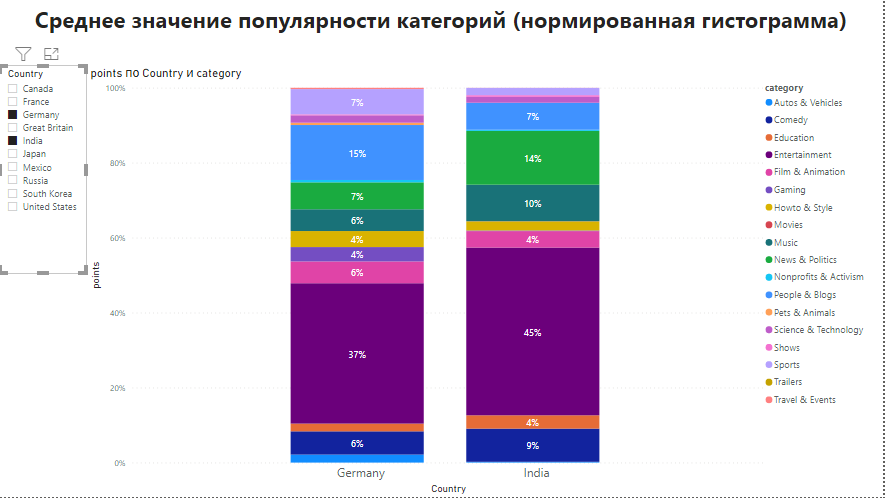

In [16]:
img = Image.open('data/pictures/no_duplicates/popularity_germany_india.png')
img

"Измерять" будем относительно немцев

1. Немец более чем в 2 раза более заинтересован в теме "Авто и транспорт", чем индус
2. К жанру "Юмор" немец на 33% менее заинтересован чем индус
3. К категории "Образование" немец на заинтересован на 33% меньше, чем индус
4. Также в жанре "Развлечения" немцы на 16% менее заинтересованы, чем индусы
5. К категории "Кино и анимация" немцы проявляют на 25% больший интерес чем индусы
6. А вот к категории "Игры" у немцев наблюдается более чем в 3 раза высокий интерес, чем у индусов
7. К категории "DIY и стиль" немцы проявляют в 2 раза больший интерес, чем индусы.
8. К категории "Кино" у немцев отсутствует всякий интерес, как и у индусов
9. "Музыка" интересует немцев в 2 раза меньше, чем индусов
10. В категории "Новости и политика" немцы в 2 раза менее заинтересованы, чем индусы
11. К категории "Некоммерческие организации и активизм" немцы и индусы демонстрируют безразличие.
12. К категории "Люди и блоги" немцы проявляют в 2 раза более высокий интерес, чем индус
13. К "Животным" немцы и индусы демонстрируют единство в безразличии
14. К "Науке и технологиям" немцы и индусы в равной степени демнострируют небольшой интерес
15. И опять, к "Шоу" немцы и индусы - практически одинаково безразличны
16. А вот к "Спорту" немцы демонстрируют в 6 раз более высокий интерес, чем индус
17. К категории "Путешествия и события" немцы и индусы - безразличны

In [9]:
query = """
SELECT
    DISTINCT y.category
    , sum(y.points) OVER (PARTITION BY y.category) AS germany_category_points
    , sum(y.points) OVER () as germany_total_points
    , sum(y.points) OVER (PARTITION BY y.category) * 100 /
        sum(y.points) OVER () AS germany_percentage
    , y1.indian_percentage
    , sum(y.points) OVER (PARTITION BY y.category) * 100 /
        sum(y.points) OVER () - y1.indian_percentage AS germany_to_india_abs_pct_diff
FROM youtube y
INNER JOIN (
    SELECT 
        DISTINCT y.category AS category
        , sum(y.points) OVER(PARTITION BY y.category) * 100 /
                sum(y.points) OVER() AS indian_percentage
        FROM youtube y
        WHERE y.Country = 'India'
    ) AS y1 ON y.category = y1.category
WHERE y.Country = 'Germany'
ORDER BY y.category ASC;
"""

pd.read_sql_query(query, engine)

category  germany_category_points  germany_total_points  \
0        Autos & Vehicles                      873                 40839   
1                  Comedy                     2534                 40839   
2               Education                      844                 40839   
3           Entertainment                    15292                 40839   
4        Film & Animation                     2376                 40839   
5                  Gaming                     1565                 40839   
6           Howto & Style                     1745                 40839   
7                  Movies                        2                 40839   
8                   Music                     2372                 40839   
9         News & Politics                     2935                 40839   
10  Nonprofits & Activism                      256                 40839   
11         People & Blogs                     5988                 40839   
12         Pets & Animals                      251                 40839   
13   Science & Technology                      806                 40839   
14                  Shows                      107                 40839   
15                 Sports                     2752                 40839   
16        Travel & Events                      141                 40839   

    germany_percentage  indian_percentage  germany_to_india_abs_pct_diff  
0                    2                  0                              2  
1                    6                  8                             -2  
2                    2                  3                             -1  
3                   37                 44                             -7  
4                    5                  4                              1  
5                    3                  0                              3  
6                    4                  2                              2  
7                    0                  0                              0  
8                    5                  9                             -4  
9                    7                 14                             -7  
10                   0                  0                              0  
11                  14                  7                              7  
12                   0                  0                              0  
13                   1                  1                              0  
14                   0                  0                              0  
15                   6                  1                              5  
16                   0                  0                              0

### 3.5 Соотношение просмотров/лайков/дизлайков для разных категорий.
<a id="3.5"></a>

Мы видим, что в целом процент лайков у большинства категорий довольно стабильно высокий и колеблется между 90% и  97%.  
Но есть 3 категории, которые отличаются более низким соотношением лайков/дизлайков - Это **"Шоу"** с **87,5%** лайков, **"Новости и политика"** с **85%** лайков и **"Некоммерческие организации и активизм"** с **79,1%** лайков.

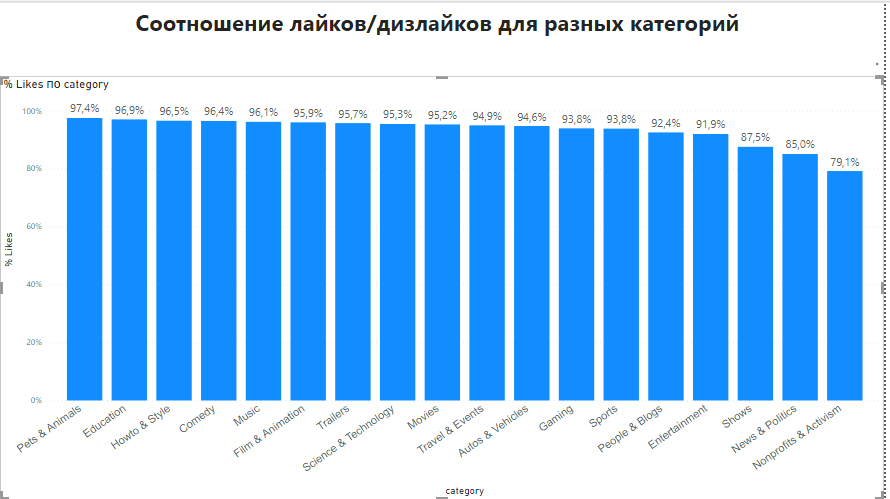

In [19]:
img = Image.open('data/pictures/no_duplicates/likes_dislikes_by_category.png')
img

### 3.6 Какие категории являются наиболее просматриваемыми на Ютубе?
<a id="3.6"></a>

Мы видим, что наиболее просматриваемыми на YouTube являются категории "Музыка" и "Развлечения". Эти категории берут на себя 28% + 27% = 55% всех видео, которые попали в рекомендации.  
Конкретно категория "Музыка" собрала 18,3 млрд. просмотров, категория "Развлечения" собрала 17,7 млрд просмотров. Суммарно видео, которые попали в тренды собрали 64 млрд. просмотров. 

In [36]:
query = """
SELECT *
    , sum(y2.total_views_by_category) OVER () as total_views
    , y2.total_views_by_category * 100 / sum(y2.total_views_by_category) OVER () as views_percentage
FROM (
    SELECT y1.category, sum(y1.max_views_per_video) as total_views_by_category
    FROM (
        SELECT
            y.video_id
            , y.category
            , max(y.views) as max_views_per_video
        FROM youtube y
        GROUP BY y.video_id) y1
    GROUP BY y1.category
    ORDER BY sum(y1.max_views_per_video) DESC) y2
"""

total_views_by_category = pd.read_sql_query(query, engine)
total_views_by_category

category  total_views_by_category  total_views  \
0                   Music              18319705979  64257131686   
1           Entertainment              17742226512  64257131686   
2          People & Blogs               5639364484  64257131686   
3                  Comedy               4598495550  64257131686   
4                  Sports               4078179896  64257131686   
5         News & Politics               3499480945  64257131686   
6        Film & Animation               3211177859  64257131686   
7           Howto & Style               2224164889  64257131686   
8                  Gaming               1428125934  64257131686   
9    Science & Technology               1283215664  64257131686   
10       Autos & Vehicles                664790876  64257131686   
11              Education                591427952  64257131686   
12         Pets & Animals                363502591  64257131686   
13  Nonprofits & Activism                271478059  64257131686   
14        Travel & Events                180763360  64257131686   
15                  Shows                152938818  64257131686   
16                 Movies                  8053865  64257131686   
17               Trailers                    38453  64257131686   

    views_percentage  
0                 28  
1                 27  
2                  8  
3                  7  
4                  6  
5                  5  
6                  4  
7                  3  
8                  2  
9                  1  
10                 1  
11                 0  
12                 0  
13                 0  
14                 0  
15                 0  
16                 0  
17                 0

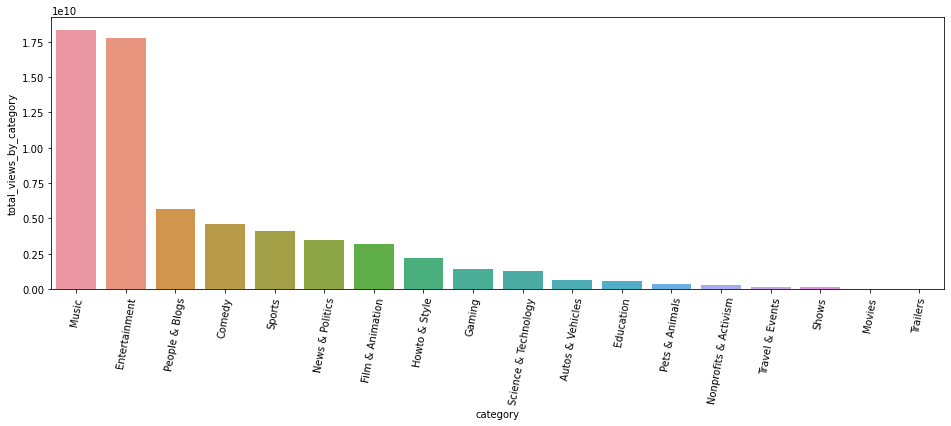

In [35]:
plt.figure(figsize=(16, 5))
g = sns.barplot(x='category', y='total_views_by_category', data=total_views_by_category)
g.set_xticklabels(g.get_xticklabels(), rotation=80);

### 3.7 Сколько просмотров набирают видео относительно каждой категории по медиане?
<a id="3.7"></a>

Так как в датасете одно и то же видео в основном удерживается несколько дней в трендах, то чтобы посмотреть сколько в среднем (точнее по медиане) набирает каждое видео относительно категорий, сгруппируем видео, указав в качестве агрегирующей функции, максимальное кол-во просмотров. 

In [41]:
query = """
SELECT 
    y.video_id
    , y.category
    , y.Country
    , max(y.views) as views
FROM youtube y
GROUP BY y.video_id
"""

max_views_per_video_id = pd.read_sql_query(query, engine)
max_views_per_video_id

video_id              category Country   views
0       --1skHapGUc         Entertainment  Mexico   30914
1       --2K8l6BWfw        Pets & Animals  France    4822
2       --45ws7CEN0                Gaming  Canada  309197
3       --6vcer7XYQ         Entertainment  Mexico  414012
4       --728h8mnDY         Howto & Style  France   39535
...             ...                   ...     ...     ...
185787  zzuI1sona1M        People & Blogs  Russia  561824
185788  zzvWC_pDiIk        People & Blogs  Russia   20389
185789  zzxLG6R5cHI  Science & Technology  Mexico   62134
185790  zzyGHbhCpV4       News & Politics   Japan    9760
185791  zzz0_5fMnI8       News & Politics  France   19190

[185792 rows x 4 columns]

Если мы посмотрим на просмотры за 1 видео в разрезе медианы, то получается что по медиане наибольшее число просмотров набирают категории "Шоу", "Комедия" и "Музыка" - 205000, 166000 и 145000 просмотров соответственно.
Наименьшее количество просмотров за 1 видео по медиане набирают такие категории как "Фильмы", "Некоммерческие организации и активизм" и "Трейлеры" - 30000, 27500 и 10000 просмоторов соответственно.

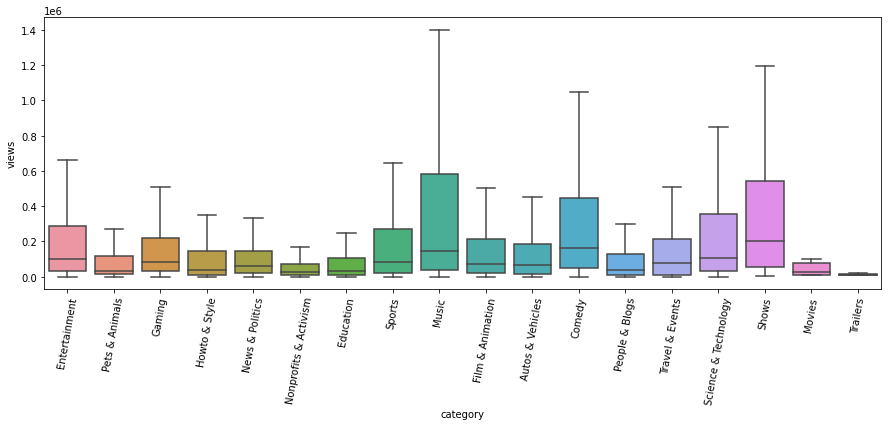

In [45]:
# Без выбросов
plt.figure(figsize=(15, 5))
g = sns.boxplot(x='category', y='views', data=max_views_per_video_id, showfliers=False)
g.set_xticklabels(g.get_xticklabels(), rotation=80);

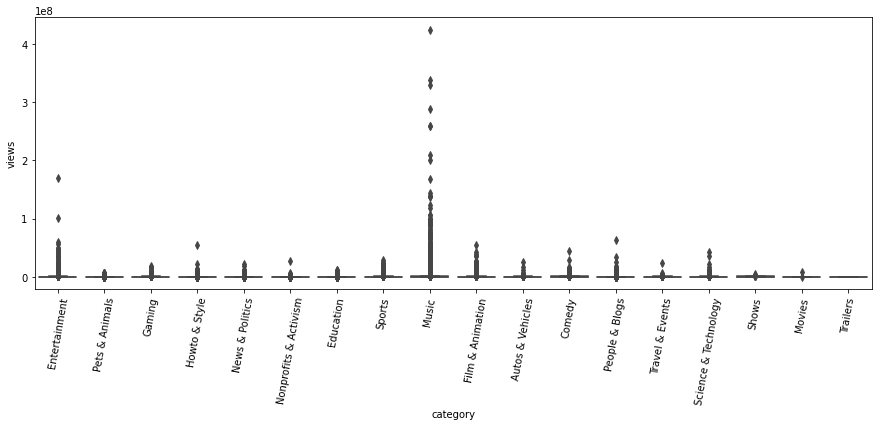

In [43]:
# С выбросами
plt.figure(figsize=(15, 5))
g = sns.boxplot(x='category', y='views', data=max_views_per_video_id)
g.set_xticklabels(g.get_xticklabels(), rotation=80);

Медиана в виде таблицы

In [47]:
max_views_per_video_id.groupby('category', as_index=False).agg({'views': np.median}) \
    .sort_values('views', ascending=False)

category     views
14                  Shows  204277.0
1                  Comedy  165739.0
8                   Music  145068.0
13   Science & Technology  107875.0
3           Entertainment  101522.0
5                  Gaming   84119.0
15                 Sports   83510.0
17        Travel & Events   75513.0
4        Film & Animation   70707.0
0        Autos & Vehicles   68402.0
9         News & Politics   60025.0
11         People & Blogs   39101.0
6           Howto & Style   36690.5
12         Pets & Animals   34659.0
2               Education   30932.0
7                  Movies   29556.0
10  Nonprofits & Activism   27185.0
16               Trailers    9804.0

### 3.8 Сезонность трендов в Британии.
<a id="3.8"></a>

Я заметил некую сезонность, или, возможно какие-то локальные события, меняющие немного характер контента потребления относительно трендов, если разбить их по странам. Из общего списка стран выбивается Британия. 

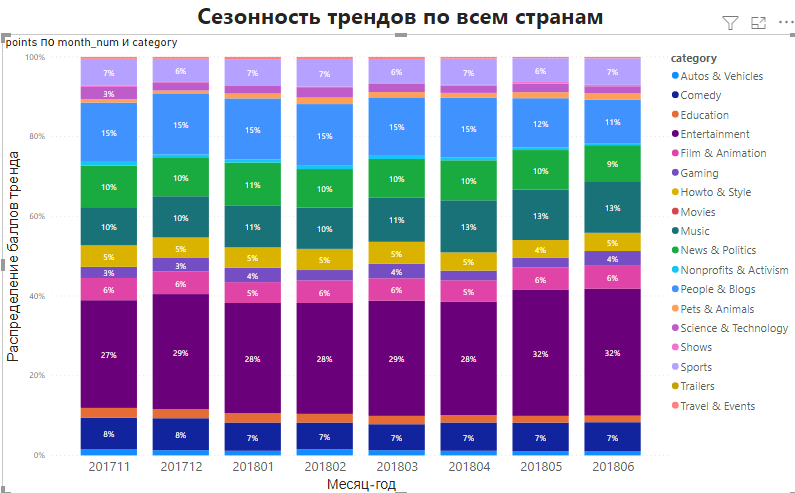

In [50]:
img = Image.open('data/pictures/seasonality_overall.png')
img

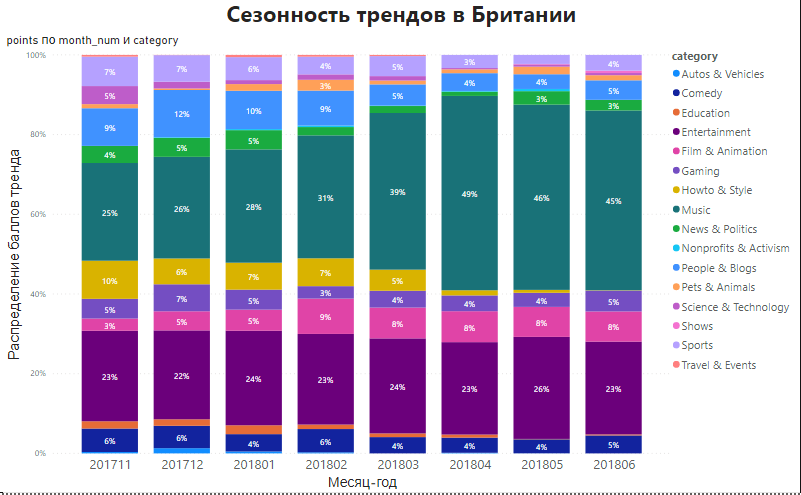

In [51]:
img = Image.open('data/pictures/seasonality_in_britain.png')
img

### 3.8.1 Почему начала расти доля категории "Музыка" в трендах Британии? Выдвинуть гипотезу
<a id="3.8.1"></a>

Мы видим, что категории изначально распределились определенным образом и попадали в тренды более-менее стабильно до марта 2018. А с марта 2018 "Музыка" стала вытеснять другие категории.

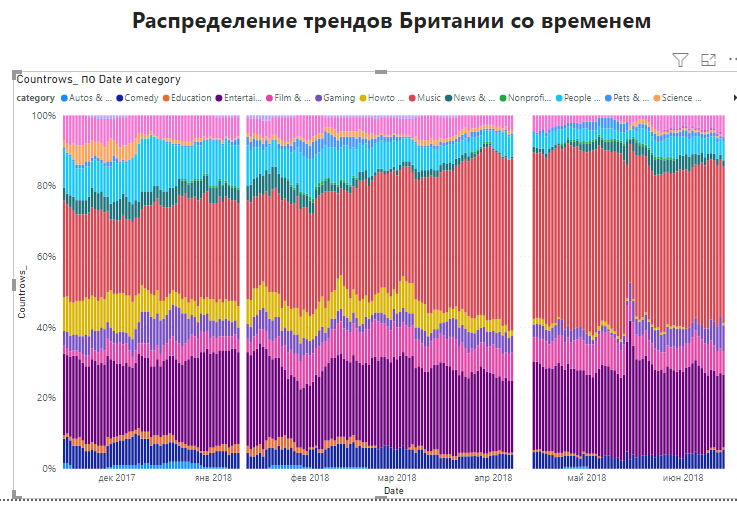

In [52]:
img = Image.open('data/pictures/stage_2/time_series_trends_britain.png')
img

Та же диаграмма в табличном виде

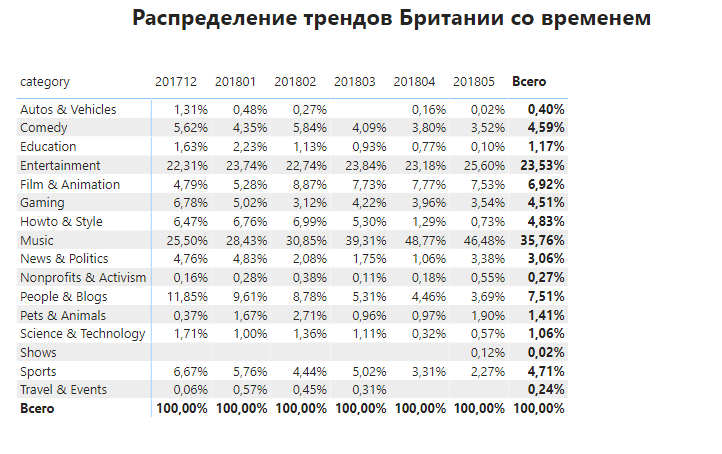

In [53]:
img = Image.open('data/pictures/stage_2/time_series_trends_britain_table_month.png')
img

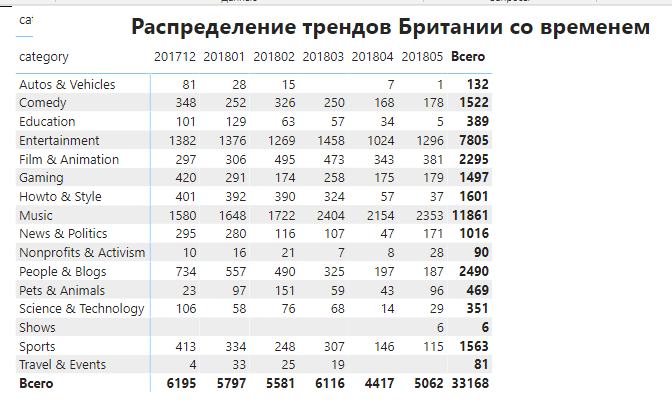

In [54]:
img = Image.open('data/pictures/stage_2/time_series_trends_britain_table_month_abs.png')
img

Мы видим, что среднее кол-во мест, занятых музыкой резко вырастает в конце марта-апреле 2018 с 51 до 97. Как мы увидим ниже причиной этому станут резко вырасшее удержание в трендах видео с категорией "Музыка". То есть категория музыка стала более интересна пользователям, чем другие категории.
Коеффициент корректировки ввелся для того, чтобы компенсировать общее кол-во квот в день для Британии. Поскольку, как было видно на прошлых графиках, кол-во квот в сутки, выдаваемые Британии Ютубом резко сократилось до 170 после марта 2018 (если это не баг бота при парсинге). Другие страны в плане квот ведут себя стабильно.

Теперь посмотрим какие музыкальные фестивали проходили в США в это время:
Ultra Music Festival (UMF) — ежегодный фестиваль электронной танцевальной музыки, который проводится в марте в городе Майами, штат Флорида, США. Является одним из крупнейших фестивалей в мире.   
В 2018 году проводился с 23 по 25 марта 2018.
Ежегодное количество участников - 150000 человек.   
Британия - мировая столица музыки. И центр музыкального туризма.

Также самые крупные фестивали проходят весной в США и летом в Британии. Возможно этой традиции способствуют климатические особенности этих 2-х регионов. Так как США находится значительно ближе к Экватору, чем Британия, то и тепло наступает там первее. Фестивали - это мероприятие, которое проводится на улице, соответственно должна быть комфортная температура - не холодно и не жарко.   

Возьмем март - средняя температура в Техасе - около +18 градусов. В то же время в Британии - около +8 градусов. +8 - довольно прохладно, чтобы проводить фестивали на улице. 

А в июне - наиболее комфортно - в Британии проводить фестивали, поскольку температура там +18, а в Техасе - +28 с максимумом +30. Что уже жарко, учитывая, что это - температура в тени. А на солнце - все +40, +45. А в Майами, штат Флорида - еще жарче.

**Так что вполне вероятно, что старт музыкальному сезону задает США весной. А Британия подхватывает летом.
Это и является причиной отклонения в трендах в сторону музыки**   

**То есть имеется корреляция между частотой фестивалей и средней температурой воздуха в этом регионе.**

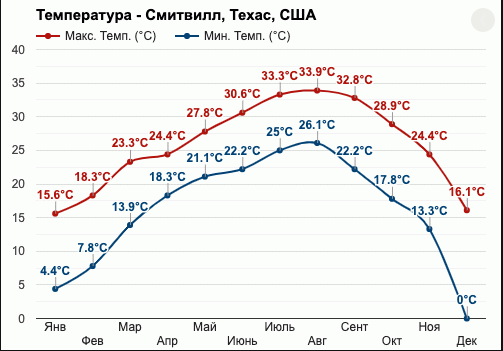

In [55]:
img = Image.open('data/pictures/stage_2/temperature_texas.png')
img

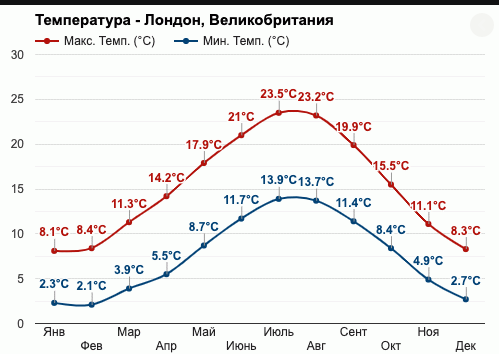

In [56]:
img = Image.open('data/pictures/stage_2/temperature_london.png')
img

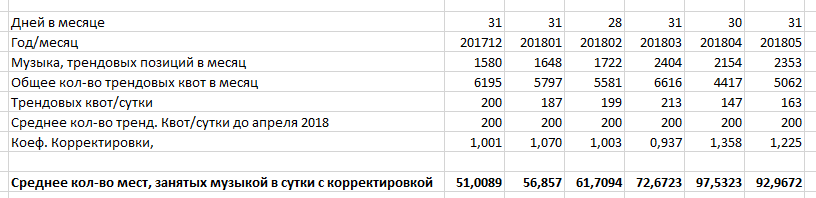

In [57]:
img = Image.open('data/pictures/stage_2/time_series_trends_britain_table_excel.png')
img

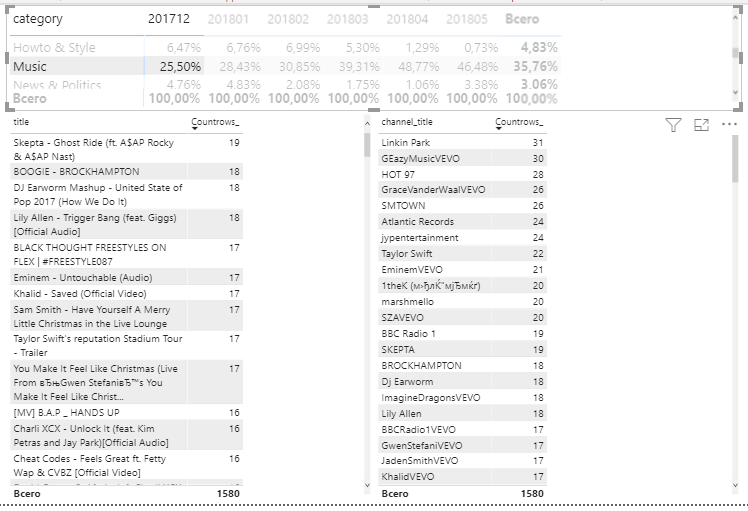

In [58]:
img = Image.open('data/pictures/stage_2/britain_music_trends_201712.png')
img

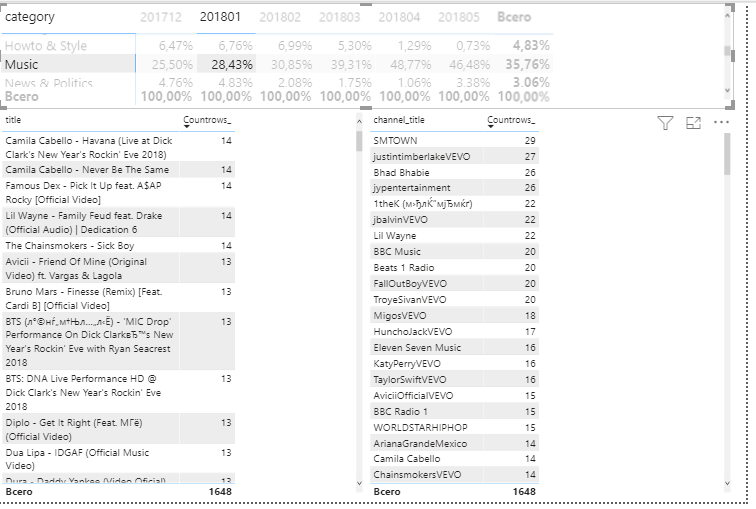

In [59]:
img = Image.open('data/pictures/stage_2/britain_music_trends_201801.png')
img

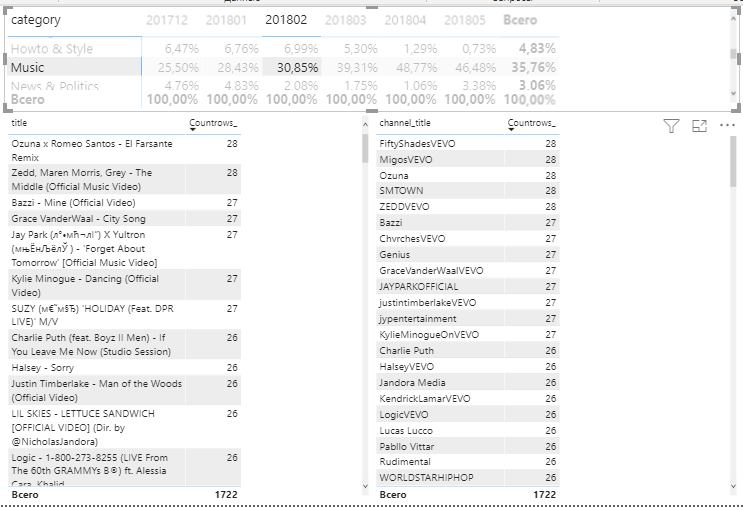

In [60]:
img = Image.open('data/pictures/stage_2/britain_music_trends_201802.png')
img

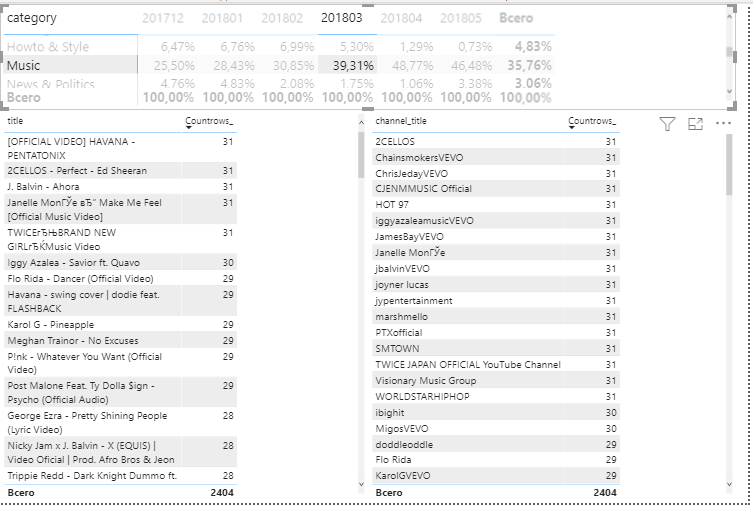

In [61]:
img = Image.open('data/pictures/stage_2/britain_music_trends_201803.png')
img

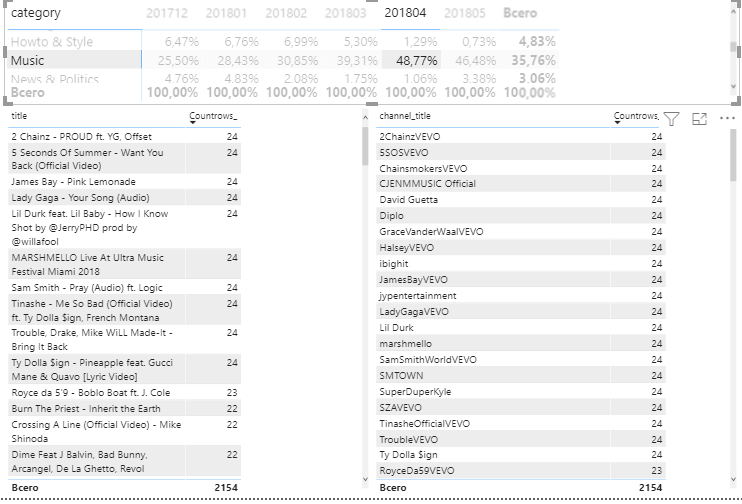

In [62]:
img = Image.open('data/pictures/stage_2/britain_music_trends_201804.png')
img

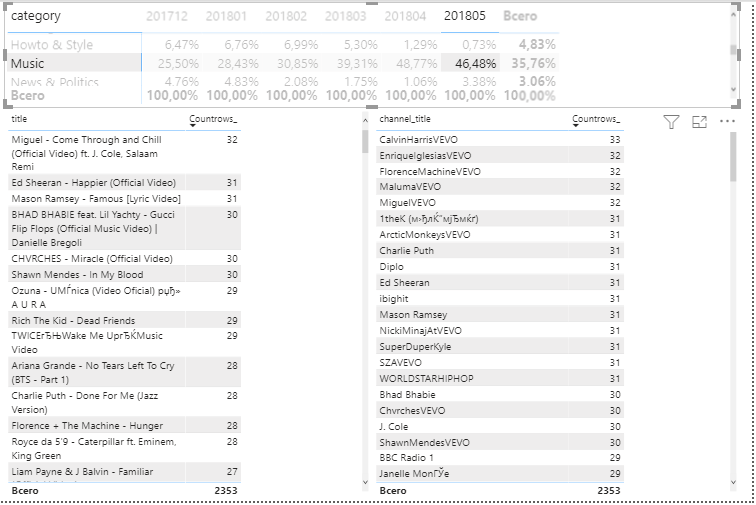

In [63]:
img = Image.open('data/pictures/stage_2/britain_music_trends_201805.png')
img

Как мы видим - если судить по конкретным видео и каналам с марта-апреля 2018 музыкальные видео заняли тренды. Выросло кол-во раз, когда конкретные музыкальные видео удерживаются в трендах практически 30 дней подряд.

### 3.9 Суточные квоты Ютуба на тренды для стран
<a id="3.9"></a>

Мы видим, что суточное кол-во трендов для всех стран является стабильным. И составляет в среднем - 1800 / 10 стран = 180 видеоквот на страну в сутки. Скачек в квотах 7.02.2018 - это начали собирать данные по Японии. Мы видим, что как только "подключили" Японию в базу - наш график ступенчато возрос и стабилизировался. При этом суточное количество квот на 1 страну немного снизилось до 1900 / 11 = 173 квоты/сутки.

Также мы видим, что в период с 9.01.2018 по 12.01.2018 и с 7.04.2018 по 14.04.2018 у нас полностью отсутсвуют данные по трендам. Возможно по какой-то технической причине (например, Youtube изменил немного структуру сайта...) сломался бот, который собирал данные, и автор бота не сразу заметил неисправность. Но это абсолютно никак не влияет на наш анализ, поскольку пропуски незначительные.

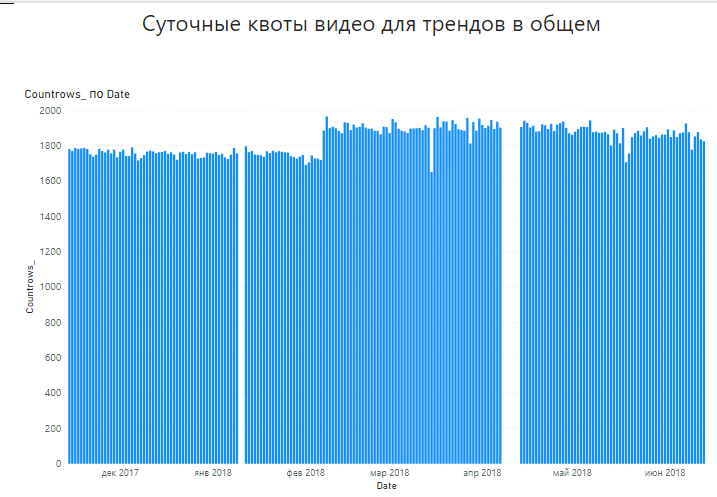

In [5]:
img = Image.open('data/pictures/stage_2/daily_YT_quotes_overall.png')
img

Мы видим, что у Британии суточные квоты на тренды после 14.04.2018 начинают активно падать. При том, что у других стран остаются стабильными на уровне 200-т квот/сутки.

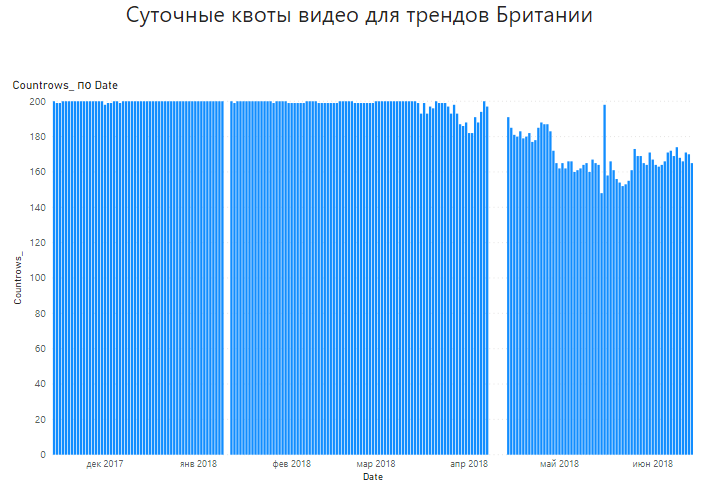

In [6]:
img = Image.open('data/pictures/stage_2/daily_YT_quotes_for_britain.png')
img

Суммируя все вышесказанное, причиной того, что региональные видео Британии не выходят в тренды, является следующее: 

**На Британию и любую другую страну Ютуб дает для трендов суточные квоты - 200 квот/сутки. Как только видео попадает в тренды, оно там держится и не дает другим видео занять свое место в трендах. Медиана удержания в трендах составляет 10 дней для Британии, в то время как в других странах - 1-2 дня. Это более чем существенное отличие**

### 3.10 Как быстро в среднем видео попадают в тренды после выпуска? 
<a id="3.10"></a>

In [9]:
df_unique_id_min_publish_date = df_no_duplicates.groupby('video_id').agg({'category': np.min, 'days_since_publish': np.min})

Мы видим, что в целом большинство категорий входят в тренды одинаково - 1 день - и видео уже в трендах. Исключения составляет категория "Трейлеры", где она входит в тренды в среднем спустя 4 дня после публикации.

**Отсюда можно сделать следующий вывод - ПЕРВЫЕ СУТКИ ЯВЛЯЮТСЯ РЕШАЮЩИМИ, ПОПАДЕТ ВИДЕО В ТРЕНДЫ, ИЛИ НЕТ. Активность пользователей в ПЕРВЫЕ СУТКИ после публикации является РЕШАЮЩЕЙ**

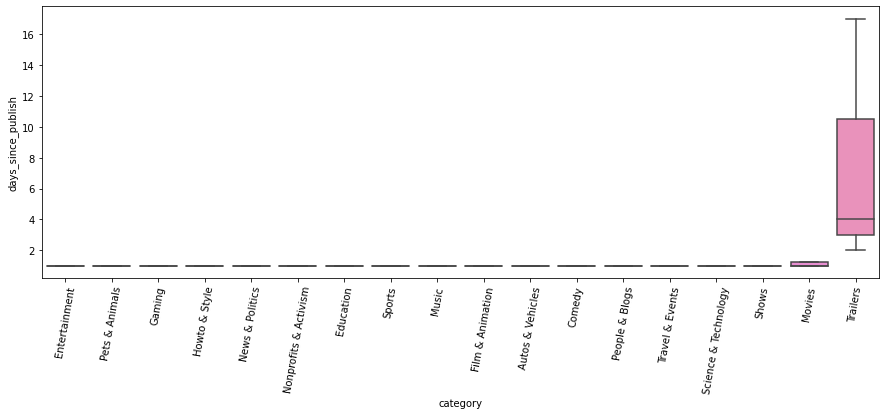

In [10]:
# Время от пуликации до первого вхождения в тренды
plt.figure(figsize=(15, 5))
g = sns.boxplot(x='category', y='days_since_publish', data=df_unique_id_min_publish_date, showfliers=False);
g.set_xticklabels(g.get_xticklabels(), rotation=80);

In [11]:
df_unique_id_min_publish_date.groupby('category').agg({'days_since_publish': np.median})

days_since_publish
category                                 
Autos & Vehicles                        1
Comedy                                  1
Education                               1
Entertainment                           1
Film & Animation                        1
Gaming                                  1
Howto & Style                           1
Movies                                  1
Music                                   1
News & Politics                         1
Nonprofits & Activism                   1
People & Blogs                          1
Pets & Animals                          1
Science & Technology                    1
Shows                                   1
Sports                                  1
Trailers                                4
Travel & Events                         1

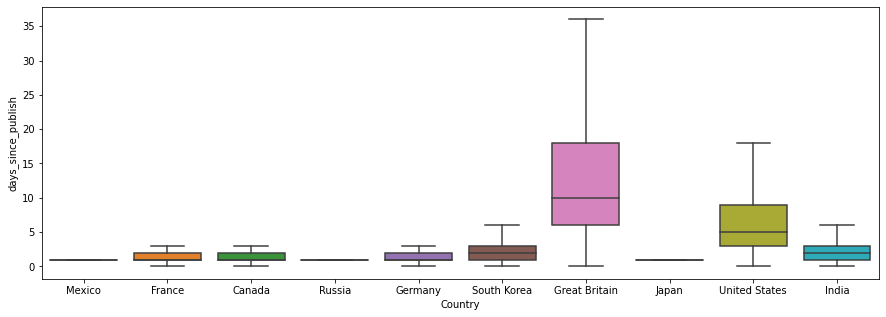

In [28]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Country', y='days_since_publish', data=df_no_duplicates, showfliers=False);

### 3.11 Почему одно и то же видео находится в трендах британии в 2 раза дольше, чем в трендах США?
<a id="3.11"></a>

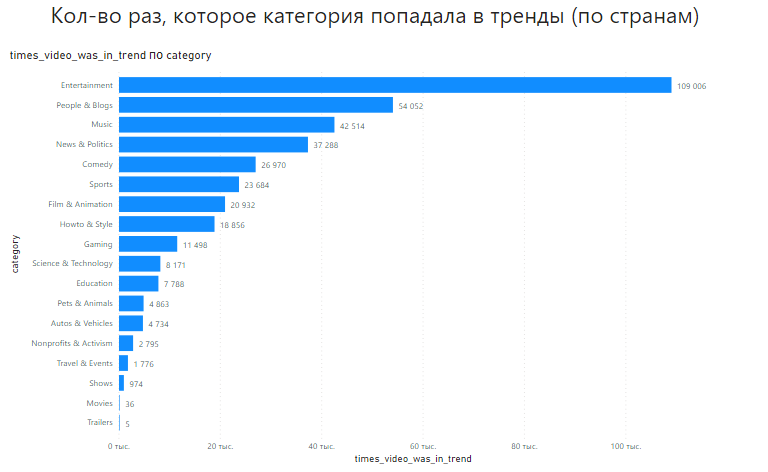

In [29]:
img = Image.open('data/pictures/stage_2/times_category_was_in_trend.png')
img

Что же объединяет все эти видео? Все эти видео объединяет английский язык и страна происхождения - США. Marvel Studio, Paramount, Taylor Swift, Maroon 5... - все это компании и исполнители США.  
Только Ed Sheeran - английский певец.  
**Конкуренция США и Англии.** США более конкурентноспособна в плане контента и вытесняет местных за счет того, что и американцы и англичане говорят на английском языке.

Также еще одно наблюдение - количество дней, которое каждое видео находилось в тренде в каждой стране отличается где-то в  1,5-2 раза. Например, видео Maroon 5 - Wait в Англии держалось 40 дней, а в США - 18 дней. То есть, одному и тому же видео в 2 РАЗА ЛЕГЧЕ удержаться в трендах Англии, чем в трендах США. Учитывая что для США и Англии Ютуб выдает по 200 квот в сутки. Это означает, что импорт из США вытесняет британского "местного производителя". Так же контент из США популярен в Индии и Канаде и часто достаточно часто занимает там трендовые квоты.
Это также означает, что конкуренция на рынке США в 2 раза жестче, чем на рынке Британии. Поскольку спустя 18 дней в США видео ушло из трендов и его место заняло какое-то другое видео. В то время, как оно еще продолжает висеть в трендах Британии.

Еще это значит, что контент из США больше цепляет британского зрителя, чем контент британского "Производителя". 

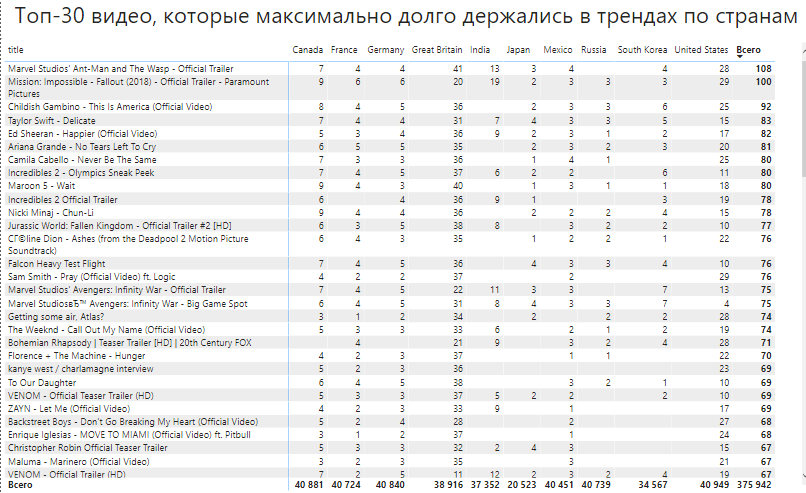

In [30]:
img = Image.open('data/pictures/stage_2/times_video_was_in_trend.png')
img

### 3.12 Найти новостные инфоповоды, которые повлияли на тренды Ютуба
<a id="3.12"></a>

Для того, чтобы ответить на этот вопрос - пойдем по следующему пути - это выбросы в данных по столбцу 'days_since_publish'. Другими словами - найдем видео, которые выстрелили (попали в тренды) спустя более чем 3 года после публикации

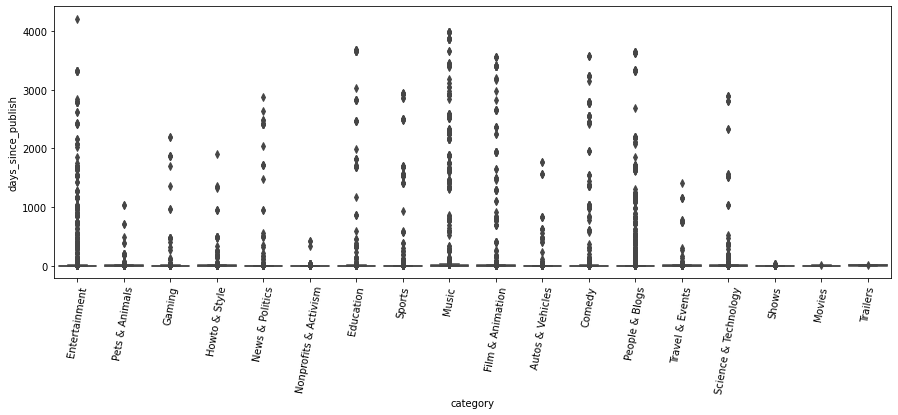

In [33]:
plt.figure(figsize=(15, 5))
g = sns.boxplot(x='category', y='days_since_publish', data=df_no_duplicates)
g.set_xticklabels(g.get_xticklabels(), rotation=80);

Мы видим, что таких уникальных записей - 154 шт.

In [38]:
query = """
    SELECT count(DISTINCT video_id) AS videos_in_trends_after_1_year_since_publish
    FROM youtube
    WHERE days_since_publish > 1000
"""
pd.read_sql_query(query, engine)

videos_in_trends_after_1_year_since_publish
0                                          154

In [39]:
df_trending_after_1000_days = df_no_duplicates[df_no_duplicates['days_since_publish'] > 1000].groupby('video_id') \
                                        .agg({'video_id': np.max, 'trending_date': np.min, 
                                              'title': np.max, 'channel_title': np.max, 'tags': np.max,
                                             'views': np.min, 'likes': np.min, 'dislikes': np.min, 'comment_count': np.min,
                                             'description': np.max, 'category': np.max, 'publish_date_no_tz': np.min,
                                             'Country': np.max, 'days_since_publish':np.min})

In [40]:
df_trending_after_1000_days.sort_values('views', ascending=False).head(50)

video_id        trending_date  \
video_id                                        
qu-biRtYEcU  qu-biRtYEcU  2017-11-26 00:00:00   
7nKZt8uz9ZM  7nKZt8uz9ZM  2018-01-16 00:00:00   
moe3i3AycwE  moe3i3AycwE  2017-12-15 00:00:00   
8HON4AswPVk  8HON4AswPVk  2017-11-14 00:00:00   
36sO84Hq6kw  36sO84Hq6kw  2017-11-21 00:00:00   
QJ7vgnWARNA  QJ7vgnWARNA  2018-01-16 00:00:00   
DfYRIN3U3SU  DfYRIN3U3SU  2018-01-02 00:00:00   
zzjNCiCqiOs  zzjNCiCqiOs  2017-12-26 00:00:00   
uheJQjs2nQY  uheJQjs2nQY  2017-12-27 00:00:00   
hTSAyR3nOR0  hTSAyR3nOR0  2018-01-17 00:00:00   
d8RW-WSpAhQ  d8RW-WSpAhQ  2017-11-14 00:00:00   
P_37AVnrqG0  P_37AVnrqG0  2018-01-16 00:00:00   
TosJRlDgKCA  TosJRlDgKCA  2018-01-17 00:00:00   
lT47mzF3QVM  lT47mzF3QVM  2017-11-14 00:00:00   
JZYR2n5IWAc  JZYR2n5IWAc  2017-11-29 00:00:00   
K7NE3nfdkgg  K7NE3nfdkgg  2017-12-02 00:00:00   
MJO3FmmFuh4  MJO3FmmFuh4  2018-02-05 00:00:00   
rrkW65P-5sc  rrkW65P-5sc  2017-12-04 00:00:00   
qxXZF60EPdM  qxXZF60EPdM  2018-01-25 00:00:00   
moLKl5PzZLc  moLKl5PzZLc  2017-11-16 00:00:00   
4diqg8_3a-0  4diqg8_3a-0  2018-02-05 00:00:00   
NXNM0dTzHOE  NXNM0dTzHOE  2018-01-06 00:00:00   
iLN0_ghe-Tc  iLN0_ghe-Tc  2017-11-29 00:00:00   
76c_nxhuVdM  76c_nxhuVdM  2018-01-17 00:00:00   
dqkEniTFTH0  dqkEniTFTH0  2017-12-19 00:00:00   
j5AILysDDTI  j5AILysDDTI  2017-11-14 00:00:00   
_OkxKKsL2u8  _OkxKKsL2u8  2018-01-01 00:00:00   
Upems4CB_ps  Upems4CB_ps  2017-11-30 00:00:00   
i_DA2Uze6GM  i_DA2Uze6GM  2017-11-20 00:00:00   
tYFYoLEO0dM  tYFYoLEO0dM  2018-01-18 00:00:00   
6A3cHzFQsqI  6A3cHzFQsqI  2018-01-25 00:00:00   
L1fwxUV6GJE  L1fwxUV6GJE  2017-11-14 00:00:00   
EDyun420L3E  EDyun420L3E  2018-01-16 00:00:00   
4qOeuzeNfQ8  4qOeuzeNfQ8  2018-01-27 00:00:00   
45L82cOjfY0  45L82cOjfY0  2018-02-06 00:00:00   
SV2sPlDLQtU  SV2sPlDLQtU  2017-12-27 00:00:00   
vd4zwINEcLY  vd4zwINEcLY  2017-11-14 00:00:00   
qC0I5PEhkJo  qC0I5PEhkJo  2017-11-15 00:00:00   
Q_VeGFPY6BM  Q_VeGFPY6BM  2018-02-25 00:00:00   
e_LpxldL8h4  e_LpxldL8h4  2017-12-29 00:00:00   
9Rl8U6v6__4  9Rl8U6v6__4  2017-12-03 00:00:00   
GC4gnq94kZE  GC4gnq94kZE  2018-01-08 00:00:00   
gO_QM9oUcM0  gO_QM9oUcM0  2017-11-27 00:00:00   
wFEAoF7RC7Y  wFEAoF7RC7Y  2017-11-25 00:00:00   
rtQXLmkeOgo  rtQXLmkeOgo  2017-12-12 00:00:00   
p9zTSvEpt_8  p9zTSvEpt_8  2018-01-25 00:00:00   
tP_Dk81f9fg  tP_Dk81f9fg  2018-01-28 00:00:00   
d8HKnWncwks  d8HKnWncwks  2017-12-22 00:00:00   
iwd9apG72IE  iwd9apG72IE  2018-01-16 00:00:00   
K9kVsnTQh-g  K9kVsnTQh-g  2018-01-25 00:00:00   

                                                         title  \
video_id                                                         
qu-biRtYEcU                                Volar - Jaime Ciero   
7nKZt8uz9ZM                Zombie - Cranberries  MTV Unplugged   
moe3i3AycwE  Frida | 'Dancing Around An Issue' (HD) - Salma...   
8HON4AswPVk                            Arvo Pärt - Tabula Rasa   
36sO84Hq6kw  Imperial Anthem of the Ottoman Empire - Mecidi...   
QJ7vgnWARNA               Dolores O'Riordan - When You're Gone   
DfYRIN3U3SU                        November Rain Guns N' Roses   
zzjNCiCqiOs                                      the hell hole   
uheJQjs2nQY  The Mathany Green House Project - Dropping a G...   
hTSAyR3nOR0            Dolores O'riordan - her house in Canada   
d8RW-WSpAhQ  Weed Killer Challenge: Vinegar 'Weed B Gone' v...   
P_37AVnrqG0                The Cranberries -  No Need to Argue   
TosJRlDgKCA                          The Best of Keith Jackson   
lT47mzF3QVM  Grey's Anatomy - (It's the End of the World) -...   
JZYR2n5IWAc  Arctic Monkeys - Cornerstone (Live Session for...   
K7NE3nfdkgg                                  Creepy Matt lauer   
MJO3FmmFuh4                   Budweiser - Original Whazzup? ad   
rrkW65P-5sc                                            DAY MAN   
qxXZF60EPdM               Hugh Masekela - Grazing In The Grass   
moLKl5PzZLc  Benton Fenton is missing - Hitler finds out! J...   
4diqg8_3a-0    

### 3.12.1 Инфоповод по поводу смерти солистки группы Crannberies - Dolores Mary Eileen O'Riordan
<a id="3.12.1"></a>

Внимание привлекло видео **Zombie - Cranberries MTV Unplugged**. Ищем в новостях группу Crannberies и видим, что солистка  Dolores Mary Eileen O'Riordan умерла 15.01.2018 в Лондоне. Люди начали искать ее самую знаменитую песню Zombies на Ютубе. В результате оно оказалось в трендах.

In [43]:
df_trending_after_1000_days[df_trending_after_1000_days['video_id'] == '7nKZt8uz9ZM']

video_id        trending_date  \
video_id                                        
7nKZt8uz9ZM  7nKZt8uz9ZM  2018-01-16 00:00:00   

                                           title    channel_title  \
video_id                                                            
7nKZt8uz9ZM  Zombie - Cranberries  MTV Unplugged  CranberriesVEVO   

                                                          tags    views  \
video_id                                                                  
7nKZt8uz9ZM  MTV Unplugged (TV Program)|"The Cranberries (M...  1174711   

             likes  dislikes  comment_count  \
video_id                                      
7nKZt8uz9ZM   5859        82            535   

                                                   description       category  \
video_id                                                                        
7nKZt8uz9ZM  Zombie Live Taratata:https://www.youtube.com/w...  Entertainment   

              publish_date_no_tz Country  days_since_publish  
video_id                                                      
7nKZt8uz9ZM  2013-07-31 00:00:00  Canada                1630

Где оно продержалось в трендах Канады 2 дня.

In [44]:
df_no_duplicates[df_no_duplicates['video_id'] == '7nKZt8uz9ZM']

video_id        trending_date                                title  \
47929  7nKZt8uz9ZM  2018-01-16 00:00:00  Zombie - Cranberries  MTV Unplugged   
47930  7nKZt8uz9ZM  2018-01-17 00:00:00  Zombie - Cranberries  MTV Unplugged   

         channel_title                                               tags  \
47929  CranberriesVEVO  MTV Unplugged (TV Program)|"The Cranberries (M...   
47930  CranberriesVEVO  MTV Unplugged (TV Program)|"The Cranberries (M...   

         views  likes  dislikes  comment_count  \
47929  1174711   5859        82            535   
47930  1250500   6290        84            586   

                                       thumbnail_link  ...  ratings_disabled  \
47929  https://i.ytimg.com/vi/7nKZt8uz9ZM/default.jpg  ...                 0   
47930  https://i.ytimg.com/vi/7nKZt8uz9ZM/default.jpg  ...                 0   

       video_error_or_removed  \
47929                       0   
47930                       0   

                                             description       category  \
47929  Zombie Live Taratata:https://www.youtube.com/w...  Entertainment   
47930  Zombie Live Taratata:https://www.youtube.com/w...  Entertainment   

        publish_time_no_tz   publish_date_no_tz Country points  \
47929  2013-07-31 18:33:42  2013-07-31 00:00:00  Canada      1   
47930  2013-07-31 18:33:42  2013-07-31 00:00:00  Canada      1   

       Year_month_int  days_since_publish  
47929          201801                1630  
47930          201801                1631  

[2 rows x 21 columns]

Посмотрим сколько совпадений по видео имеет ключевое слово "Dolores" или "Cranberries"

Видим 33 видео, которые , основная дата которых - 16.01.2018

In [45]:
query = """
    SELECT *
    FROM youtube
    WHERE title LIKE '%Dolores%' OR title LIKE '%Cranberries%'
    GROUP BY video_id
"""
dolores_death = pd.read_sql_query(query, engine)
dolores_death

video_id        trending_date  \
0   0nVO-yU0oxM  2018-01-16 00:00:00   
1   3hn14sIQc6E  2018-01-16 00:00:00   
2   5m3jbprryEM  2018-05-17 00:00:00   
3   5mMjpJ6vR_o  2018-01-16 00:00:00   
4   5rUfyUN7veY  2018-01-17 00:00:00   
5   7nKZt8uz9ZM  2018-01-16 00:00:00   
6   A7PZNHUlQi8  2018-01-16 00:00:00   
7   AufR4Ajod5U  2018-01-17 00:00:00   
8   EDyun420L3E  2018-01-16 00:00:00   
9   FFup6eiG0f0  2018-01-16 00:00:00   
10  IP9btlfEk-8  2018-01-13 00:00:00   
11  P_37AVnrqG0  2018-01-16 00:00:00   
12  Q7KfJ5HMghw  2018-01-16 00:00:00   
13  QJ7vgnWARNA  2018-01-16 00:00:00   
14  QwglwQlVSEg  2018-01-16 00:00:00   
15  RkzGWTpeeEI  2018-01-16 00:00:00   
16  VoA-UVMIOzs  2018-01-16 00:00:00   
17  Wer2JDtSA1s  2018-01-16 00:00:00   
18  Xar6AFEYpZg  2018-01-16 00:00:00   
19  YekGSAOyLng  2018-01-16 00:00:00   
20  Yf5ArkLMVCM  2018-01-16 00:00:00   
21  YrcVsF0QvaM  2018-01-17 00:00:00   
22  ZHkVdeQl21E  2018-01-23 00:00:00   
23  ZpNABHY1f8I  2017-11-29 00:00:00   
24  gMPzi1ethAk  2018-01-17 00:00:00   
25  hTSAyR3nOR0  2018-01-17 00:00:00   
26  ia_NWRMgoAA  2018-01-20 00:00:00   
27  jwADOxzjfsQ  2018-01-16 00:00:00   
28  k0HUiU_qSac  2018-03-06 00:00:00   
29  lRAGdJoCuzc  2018-01-16 00:00:00   
30  sSnHRLLy3p0  2018-01-16 00:00:00   
31  tYFYoLEO0dM  2018-01-18 00:00:00   
32  tm6Edi3lZIA  2018-01-16 00:00:00   
33  wl1CAr2PERE  2018-01-16 00:00:00   
34  xLheVndnabg  2018-01-16 00:00:00   
35  ypcO0KWJZyU  2018-02-08 00:00:00   

                                                title  \
0     Cranberries singer Dolores O'Riordan dead at 46   
1   Dolores O'Riordan, The Cranberries singer, dea...   
2   Elena Farga se sienta en una silla al ritmo de...   
3   Dolores O'Riordan, la chanteuse des Cranberrie...   
4    The Cranberries - Stars (The Best Of 1992-2002 )   
5                 Zombie - Cranberries  MTV Unplugged   
6   Fallece Dolores O'Riordan Muere vocalista de T...   
7           The Cranberries - Zombie (R.I.P. Dolores)   
8                            Dolores habla en español   
9   Muere repentinamente a los 46 años Dolores O'R...   
10  Bebe una cuchara al día y nunca tendrá dolores...   
11                The Cranberries -  No Need to Argue   
12  La chanteuse de The Cranberries, Dolores O'Rio...   
13               Dolores O'Riordan - When You're Gone   
14          Fallece Dolores O'Riordan (ADN40)(MÉXICO)   
15               El Ultimo Tweet de Dolores O'Riordan   
16  FALLECE DOLORES O'RIORDAN MUERE VOCALISTA DE T...   
17  ADIÓS DOLORES O'RIORDAN 1971-2018 | The Cranbe...   
18  My Tribute To Dolores O'Riordan (R.I.P) 1971-2...   
19  TRENDING 15 ENERO - DIVAZA 5M, MUERE VOCALISTA...   
20  Murió Dolores O'Riordan, vocalista de The Cra...   
21         Умерла Долорес О’Риордан (The Cranberries)   
22  REVELAN la causa del Fallecimiento de Dolores ...   
23  Té para dolores de cabezas, migrañas y problem...   
24  ¿Por qué murió Dolores O'Riordan vocalista The...   
25            Dolores O'riordan - her house in Canada   
26                   How the Cranberries Rose to Fame   
27  Fallece Dolores O'Riordan, vocalista de The Cr...   
28           SIENTES ESTOS DOLORES AL TOCAR GUITARRA?   
29  Murió Dolores O'Riordan, vocalista de The Cran...   
30                 The Cranberries BBC Breakfast 2017   
31          The Cranberries - Dreams (Music Video HQ)   
32  La muerte de Dolores O'Riordan apaga una de la...   
33  Muere la vocalista de The Cranberries | Notici...   
34  The Cranberries (†) - Live 2017 @ Paris Olympi...   
35    TOP 7 DOLORES MAS FUERTE QUE TENDRAS EN TU VIDA   

                                  channel_title  \
0                                      CBC News   
1                           New York Daily News   
2                               Factor X España   
3                                       6Medias   
4                                         Lotov   
5                               CranberriesVEVO   
6                                      Tuitealo   
7       

Мы видим, что данный инфоповод в плане трендов резко сбавляет спустя уже 2-3 день после смерти.

In [46]:
dolores_death.groupby('trending_date')[['trending_date']].count()

trending_date
trending_date                     
2017-11-29 00:00:00              1
2018-01-13 00:00:00              1
2018-01-16 00:00:00             23
2018-01-17 00:00:00              5
2018-01-18 00:00:00              1
2018-01-20 00:00:00              1
2018-01-23 00:00:00              1
2018-02-08 00:00:00              1
2018-03-06 00:00:00              1
2018-05-17 00:00:00              1

Вот так выглядят упоманания по ключеву слову "Dolores"

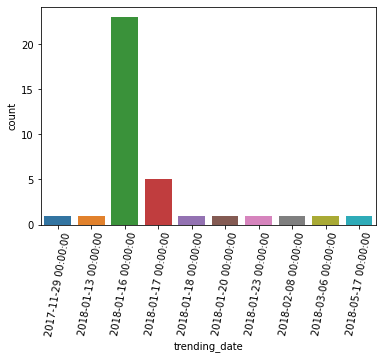

In [47]:
g = sns.countplot(x='trending_date', data=dolores_death.sort_values('trending_date'))
g.set_xticklabels(g.get_xticklabels(), rotation=80);

### 3.12.2 Инфоповод по поводу сексуального скандала актрисы Сальмы Хайек и американского кинопродюссера Харви Вайнштейна
<a id="3.12.2"></a>

Далее, возьмем видео, которое попало в тренды только спустя 3 года после публикации под названием **Frida | 'Dancing Around An Issue' (HD)** Что же могло этому поспособствовать?

In [48]:
query = """
    SELECT *
    FROM youtube
    WHERE video_id LIKE 'moe3i3AycwE'
"""
pd.read_sql_query(query, engine)

video_id        trending_date  \
0  moe3i3AycwE  2017-12-15 00:00:00   

                                               title channel_title  \
0  Frida | 'Dancing Around An Issue' (HD) - Salma...       Miramax   

                                                tags   views  likes  dislikes  \
0  Trailer|"Official Trailer"|"Frida"|"Oscars"|"C...  787752   1488       135   

   comment_count                                  thumbnail_link  ...  \
0             62  https://i.ytimg.com/vi/moe3i3AycwE/default.jpg  ...   

   ratings_disabled  video_error_or_removed  \
0                 0                       0   

                                         description          category  \
0  Frida (Salma Hayek) wins a dance with Tina (As...  Film & Animation   

    publish_time_no_tz   publish_date_no_tz Country points  Year_month_int  \
0  2014-12-11 20:21:20  2014-12-11 00:00:00  Canada      1          201712   

   days_since_publish  
0                1100  

[1 rows x 21 columns]

Дело в том, что главной героиней этого видео является Salma Hayek.  
Дата попадания в тренды этого видео 15-12-2017 совпадает с датой сексуального скандала с участием Харви Вайнштейна.  
Публикация NYTimes от 13/12/2017
https://www.nytimes.com/interactive/2017/12/13/opinion/contributors/salma-hayek-harvey-weinstein.html



Еще одно видео попало в тренды Мексики с ключевым словом "Hayek" 16.12.2017. Сальма Хайек - мексиканская актриса

In [49]:
query = """
    SELECT video_id, trending_date, title, views, category, Country, days_since_publish
    FROM youtube
    WHERE title LIKE '%Hayek%'
    GROUP BY video_id
"""
pd.read_sql_query(query, engine)

video_id        trending_date  \
0  0ADsNDbX6XY  2017-12-16 00:00:00   
1  Oajf12wWYdQ  2018-03-05 00:00:00   
2  moe3i3AycwE  2017-12-15 00:00:00   

                                               title   views  \
0  TRENDING 15 DICIEMBRE - ZURIPONS EN DOWNTOWN, ...   69655   
1         SALMA HAYEK SE EQUIVOCA EN LOS OSCARES !!!    2361   
2  Frida | 'Dancing Around An Issue' (HD) - Salma...  787752   

           category Country  days_since_publish  
0     Entertainment  Mexico                   0  
1     Entertainment  Mexico                   0  
2  Film & Animation  Canada                1100